## Final Project Submission

Please fill out:
* Student name: Catherine Gakii, Peggy Obam, Tobias Ng'ong'a, John Gikonyo, Muthoni Kahura, Wambui Thuku, Phelix Okumu
* Student pace: part time 
* Scheduled project review date/time: 
* Instructor name: William Okomba
* Blog post URL:


# **1.0 Introduction**

# Problem Statement

**1.01 Business Statement**

1. To understand which factors determines the price of a home.

2. To understand how square feet living affect the value of a home.
3. To explore how condition affect the price of a home.
4. To explore features which decrease and increase value of the house.

**1.02 Research questions**

1. Which factors determines the price of a home?
2. How square feet living affect the value of a home?
3. How condition affect the price of a home?
4. hich features which decrease and increase value of the house?

### **1.03 Source & description**

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

**Column Names and descriptions for Kings County Data Set**


**id**  -Unique identified for a house

**date** - Date house was sold

**price** - Price is prediction target

**bedrooms** - Number of Bedrooms/House

**bathrooms** - Number of bathrooms/bedrooms

**sqft_living** - Square footage of the home

**sqft_lot** - Square footage of the lot

**floors** - Total floors (levels) in house

**waterfront** - House which has a view to a waterfront

**view** - Has been viewed

**condition** - How good the condition is ( Overall )

**grade ** **bold text** - overall grade given to the housing unit, based on King County grading system

**sqft_above** - Square footage of house apart from basement

**sqft_basemen**t  - Square footage of the basement

**yr_built **- Built Year

**yr_renovated** - Year when house was renovated

**zipcode **- Zipcode

**lat** - Latitude coordinate

**long** - Longitude coordinate

**sqft_living15** - Square footage of interior housing living space for the nearest 15 neighbors

**sqft_lot15** - Square footage of the land lots of the nearest 15 neighbors

##**2.0 Data understanding**

In [ ]:
#importing different libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
from random import gauss
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats as stats
%matplotlib inline

In [ ]:
# Read the csv file using pandas, storing it in house_df dataframe and previewing the data 
house_df = pd.read_csv("kc_house_data.csv")
house_df

id        date     price  bedrooms  bathrooms  sqft_living  \
0      7129300520  10/13/2014  221900.0         3       1.00         1180   
1      6414100192   12/9/2014  538000.0         3       2.25         2570   
2      5631500400   2/25/2015  180000.0         2       1.00          770   
3      2487200875   12/9/2014  604000.0         4       3.00         1960   
4      1954400510   2/18/2015  510000.0         3       2.00         1680   
...           ...         ...       ...       ...        ...          ...   
21592   263000018   5/21/2014  360000.0         3       2.50         1530   
21593  6600060120   2/23/2015  400000.0         4       2.50         2310   
21594  1523300141   6/23/2014  402101.0         2       0.75         1020   
21595   291310100   1/16/2015  400000.0         3       2.50         1600   
21596  1523300157  10/15/2014  325000.0         2       0.75         1020   

       sqft_lot  floors waterfront  view  ...          grade sqft_above  \
0          5650     1.0        NaN  NONE  ...      7 Average       1180   
1          7242     2.0         NO  NONE  ...      7 Average       2170   
2         10000     1.0         NO  NONE  ...  6 Low Average        770   
3          5000     1.0         NO  NONE  ...      7 Average       1050   
4          8080     1.0         NO  NONE  ...         8 Good       1680   
...         ...     ...        ...   ...  ...            ...        ...   
21592      1131     3.0         NO  NONE  ...         8 Good       1530   
21593      5813     2.0         NO  NONE  ...         8 Good       2310   
21594      1350     2.0         NO  NONE  ...      7 Average       1020   
21595      2388     2.0        NaN  NONE  ...         8 Good       1600   
21596      1076     2.0         NO  NONE  ...      7 Average       1020   

       sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
0                0.0     1955           0.0    98178  47.5112 -122.257   
1              400.0     1951        1991.0    98125  47.7210 -122.319   
2                0.0     1933           NaN    98028  47.7379 -122.233   
3              910.0     1965           0.0    98136  47.5208 -122.393   
4                0.0     1987           0.0    98074  47.6168 -122.045   
...              ...      ...           ...      ...      ...      ...   
21592            0.0     2009           0.0    98103  47.6993 -122.346   
21593            0.0     2014           0.0    98146  47.5107 -122.362   
21594            0.0     2009           0.0    98144  47.5944 -122.299   
21595            0.0     2004           0.0    98027  47.5345 -122.069   
21596            0.0     2008           0.0    98144  47.5941 -122.299   

       sqft_living15  sqft_lot15  
0               1340        5650  
1               1690        7639  
2               2720        8062  
3               1360        5000  
4               1800        7503  
...              ...         ...  
21592           1530        1509  
21593           1830        7200  
21594           1020        2007  
21595           1410        1287  
21596           1020        1357  

[21597 rows x 21 columns]

In [ ]:
# check the shape to see the number of columns and row
house_df.shape

(21597, 21)

The house_df has 21597 rows and 21 columns

In [ ]:
# checking the general info about column data types
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

house_df has both numerical and categorical columns. date, waterfront, view, condition, grade and sqft_basement are categorical columns while the rest are numerical columns

In data cleaning, date should be converted to date.time data type. For later regression analysis, the categorical columns will be converted to numerical using OneHotEncoding or dummy

##**3.0 Data preparation and cleaning per column**

In [ ]:
# creating a new df to use for purposes of cleaning
house_df2 = house_df

Generally cheking for missing values

In [ ]:
# checking for %tage of null values across all columns
house_df2.isna().sum()/len(house_df2)*100

id                0.000000
date              0.000000
price             0.000000
bedrooms          0.000000
bathrooms         0.000000
sqft_living       0.000000
sqft_lot          0.000000
floors            0.000000
waterfront       11.001528
view              0.291707
condition         0.000000
grade             0.000000
sqft_above        0.000000
sqft_basement     0.000000
yr_built          0.000000
yr_renovated     17.789508
zipcode           0.000000
lat               0.000000
long              0.000000
sqft_living15     0.000000
sqft_lot15        0.000000
dtype: float64

Waterfront, view and yr_renovated have 11%, 0.3% and 17.8% missing values respectively. Based on above, we will handle NANs in these columns differently in the subsequent cells

#####**View Column preparation**

In [ ]:
# Checking view column for counts of ratings
house_df2['view'].value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

From above, the NONE rating has way more values 19422. With this, it would make sense to drop this column in the regression

In [ ]:
# dropping view column
house_df2 = house_df2.drop('view', axis=1)

In [ ]:
house_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   condition      21597 non-null  object 
 10  grade          21597 non-null  object 
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   17755 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

**Date Column  preparation**

Changing the date column into date.time format/datatype

In [ ]:
# creating function to change date column to datetime datatype
def convert_to_datetime(df, column_name):
    df[column_name] = pd.to_datetime(df[column_name])
    return df

In [ ]:
# calling the fuction to the date column
convert_to_datetime(house_df2, 'date')

id       date     price  bedrooms  bathrooms  sqft_living  \
0      7129300520 2014-10-13  221900.0         3       1.00         1180   
1      6414100192 2014-12-09  538000.0         3       2.25         2570   
2      5631500400 2015-02-25  180000.0         2       1.00          770   
3      2487200875 2014-12-09  604000.0         4       3.00         1960   
4      1954400510 2015-02-18  510000.0         3       2.00         1680   
...           ...        ...       ...       ...        ...          ...   
21592   263000018 2014-05-21  360000.0         3       2.50         1530   
21593  6600060120 2015-02-23  400000.0         4       2.50         2310   
21594  1523300141 2014-06-23  402101.0         2       0.75         1020   
21595   291310100 2015-01-16  400000.0         3       2.50         1600   
21596  1523300157 2014-10-15  325000.0         2       0.75         1020   

       sqft_lot  floors waterfront  condition          grade  sqft_above  \
0          5650     1.0        NaN    Average      7 Average        1180   
1          7242     2.0         NO    Average      7 Average        2170   
2         10000     1.0         NO    Average  6 Low Average         770   
3          5000     1.0         NO  Very Good      7 Average        1050   
4          8080     1.0         NO    Average         8 Good        1680   
...         ...     ...        ...        ...            ...         ...   
21592      1131     3.0         NO    Average         8 Good        1530   
21593      5813     2.0         NO    Average         8 Good        2310   
21594      1350     2.0         NO    Average      7 Average        1020   
21595      2388     2.0        NaN    Average         8 Good        1600   
21596      1076     2.0         NO    Average      7 Average        1020   

      sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0               0.0      1955           0.0    98178  47.5112 -122.257   
1             400.0      1951        1991.0    98125  47.7210 -122.319   
2               0.0      1933           NaN    98028  47.7379 -122.233   
3             910.0      1965           0.0    98136  47.5208 -122.393   
4               0.0      1987           0.0    98074  47.6168 -122.045   
...             ...       ...           ...      ...      ...      ...   
21592           0.0      2009           0.0    98103  47.6993 -122.346   
21593           0.0      2014           0.0    98146  47.5107 -122.362   
21594           0.0      2009           0.0    98144  47.5944 -122.299   
21595           0.0      2004           0.0    98027  47.5345 -122.069   
21596           0.0      2008           0.0    98144  47.5941 -122.299   

       sqft_living15  sqft_lot15  
0               1340        5650  
1               1690        7639  
2               2720        8062  
3               1360        5000  
4               1800        7503  
...              ...         ...  
21592           1530        1509  
21593           1830        7200  
21594           1020        2007  
21595           1410        1287  
21596           1020        1357  

[21597 rows x 20 columns]

In [ ]:
# checking if the date column data type has changed
house_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     19221 non-null  object        
 9   condition      21597 non-null  object        
 10  grade          21597 non-null  object        
 11  sqft_above     21597 non-null  int64         
 12  sqft_basement  21597 non-null  object        
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   17755 non-null  float64       
 15  zipcode        2159

Date column has changed from an object to datetime datatype

In [ ]:
# previewing the date column fo see head and tail
house_df2['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: date, Length: 21597, dtype: datetime64[ns]

**Grade Column view and preparation**

In [ ]:
# checking for all the unique entries in the grade column
house_df2['grade'].unique()

array(['7 Average', '6 Low Average', '8 Good', '11 Excellent', '9 Better',
       '5 Fair', '10 Very Good', '12 Luxury', '4 Low', '3 Poor',
       '13 Mansion'], dtype=object)

grade column is currently categorical. However, there are also numerical grading against every categorical grading

In [ ]:
# doing value counts to get a view of the occurence of the unique entries
house_df2['grade'].value_counts()

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

For above grade data, we will change the strings to integer data points by removing the wordings and using already existing integers. Note: oneHotEncoding is avoided because the column already has a mixup of integers and strings

In [ ]:
# Extract numbers and drop words after the first space
house_df2['grade'] = house_df2['grade'].str.extract(r'(\d+)')
house_df2['grade'] = house_df2['grade'].astype(int)

In [ ]:
# printing both unique entries of the grade column and general info about the dataframe to see possible changes on the overal dataframe
print(house_df2['grade'].unique())
house_df2.info()

[ 7  6  8 11  9  5 10 12  4  3 13]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     19221 non-null  object        
 9   condition      21597 non-null  object        
 10  grade          21597 non-null  int64         
 11  sqft_above     21597 non-null  int64         
 12  sqft_basement  21597 non-null  object        
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   17755 non-null  floa

Grade column is changed to numerical data type (int64)

**Id Column view and preparation**

In [ ]:
# dropping the duplicated id's by keeping the recent id when the house was sold
house_df2=house_df2.sort_values('id', ascending = False).drop_duplicates(subset = 'id', keep = 'last')

In [ ]:
# checking if the duplicated id dropped 
house_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 15937 to 2494
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21420 non-null  int64         
 1   date           21420 non-null  datetime64[ns]
 2   price          21420 non-null  float64       
 3   bedrooms       21420 non-null  int64         
 4   bathrooms      21420 non-null  float64       
 5   sqft_living    21420 non-null  int64         
 6   sqft_lot       21420 non-null  int64         
 7   floors         21420 non-null  float64       
 8   waterfront     19065 non-null  object        
 9   condition      21420 non-null  object        
 10  grade          21420 non-null  int64         
 11  sqft_above     21420 non-null  int64         
 12  sqft_basement  21420 non-null  object        
 13  yr_built       21420 non-null  int64         
 14  yr_renovated   17610 non-null  float64       
 15  zipcode        2

**Waterfront and Condition Columns**

In [ ]:
# Replacing NANs in waterfront by the mode of the column
waterfront_value = house_df2['waterfront'].mode().iloc[0]
house_df2['waterfront'].fillna(waterfront_value, inplace=True)

In [ ]:
# checking for unique values entries for the waterfront column after replacing NANs with the mode
house_df2['waterfront'].unique()

array(['NO', 'YES'], dtype=object)

Waterfront only contains NO and YES as unique entries as expected after clean up

In [ ]:
# checking unique entries for the condition column to understand extent of cleaning needed
house_df2['condition'].unique()

array(['Average', 'Good', 'Very Good', 'Fair', 'Poor'], dtype=object)

In [ ]:
house_df2['condition'].value_counts()

Average      13900
Good          5643
Very Good     1687
Fair           162
Poor            28
Name: condition, dtype: int64

From the above waterfront and condition, it is clear that row enteries are strings. For this columns we will do a Dummy to change this column to numerical

In [ ]:
# creating a new df called house_df2_dummy to get dummies
house_df2_dummy = house_df2.copy(deep=True)
house_df2_dummy
condition_dummy_df = house_df2_dummy[['condition', 'waterfront']]

In [ ]:
# viewing head and tail of the new condition_dummy_df dataframe created
condition_dummy_df

condition waterfront
15937    Average         NO
20963    Average         NO
7614        Good         NO
3257   Very Good         NO
16723    Average         NO
...          ...        ...
3553     Average         NO
8800        Good         NO
8404     Average         NO
6729        Good         NO
2494     Average         NO

[21420 rows x 2 columns]

In [ ]:
#using one-encoding to create dummy column
ohe = OneHotEncoder()
data_enc1= ohe.fit_transform(condition_dummy_df)


#converting the finding into dataframe
data_enc1.todense()


#getting feature names
ohe.get_feature_names_out()

array(['condition_Average', 'condition_Fair', 'condition_Good',
       'condition_Poor', 'condition_Very Good', 'waterfront_NO',
       'waterfront_YES'], dtype=object)

In [ ]:
# geting feature names in a dataframe
data3 = pd.DataFrame(data_enc1.todense(), columns=ohe.get_feature_names_out())
data3.head()


condition_Average  condition_Fair  condition_Good  condition_Poor  \
0                1.0             0.0             0.0             0.0   
1                1.0             0.0             0.0             0.0   
2                0.0             0.0             1.0             0.0   
3                0.0             0.0             0.0             0.0   
4                1.0             0.0             0.0             0.0   

   condition_Very Good  waterfront_NO  waterfront_YES  
0                  0.0            1.0             0.0  
1                  0.0            1.0             0.0  
2                  0.0            1.0             0.0  
3                  1.0            1.0             0.0  
4                  0.0            1.0             0.0

In [ ]:
##checking for encoded categorical variables 
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21420 entries, 0 to 21419
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   condition_Average    21420 non-null  float64
 1   condition_Fair       21420 non-null  float64
 2   condition_Good       21420 non-null  float64
 3   condition_Poor       21420 non-null  float64
 4   condition_Very Good  21420 non-null  float64
 5   waterfront_NO        21420 non-null  float64
 6   waterfront_YES       21420 non-null  float64
dtypes: float64(7)
memory usage: 1.1 MB


**sqft_basement variable view and preparation**

In [ ]:
# cleaning the sqft_basement column by replacing the '?' that is making the column an object, and replacing it with a NaN. 
house_df2['sqft_basement'].unique()
house_df2.sqft_basement.replace('?', np.NaN, inplace=True)

# changing the sqft_basement column datatype to a floating point
house_df2.sqft_basement = house_df2.sqft_basement.astype(float)

In [ ]:
# replacing the np.NaN int he sqft_basement column with the mean
house_df2.sqft_basement.replace(np.NaN, house_df2['sqft_basement'].mean(), inplace=True)

In [ ]:
# General view of house_df2 head to after making changes to the sqft_basement
house_df2.head()

id       date     price  bedrooms  bathrooms  sqft_living  \
15937  9900000190 2014-10-30  268950.0         3       1.00         1320   
20963  9895000040 2014-07-03  399900.0         2       1.75         1410   
7614   9842300540 2014-06-24  339000.0         3       1.00         1100   
3257   9842300485 2015-03-11  380000.0         2       1.00         1040   
16723  9842300095 2014-07-25  365000.0         5       2.00         1600   

       sqft_lot  floors waterfront  condition  grade  sqft_above  \
15937      8100     1.0         NO    Average      6         880   
20963      1005     1.5         NO    Average      9         900   
7614       4128     1.0         NO       Good      7         720   
3257       7372     1.0         NO  Very Good      7         840   
16723      4168     1.5         NO    Average      7        1600   

       sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
15937          440.0      1943           NaN    98166  47.4697 -122.351   
20963          510.0      2011           0.0    98027  47.5446 -122.018   
7614           380.0      1942           NaN    98126  47.5296 -122.379   
3257           200.0      1939           0.0    98126  47.5285 -122.378   
16723            0.0      1927           0.0    98126  47.5297 -122.381   

       sqft_living15  sqft_lot15  
15937           1000        8100  
20963           1440        1188  
7614            1510        4538  
3257            1930        5150  
16723           1190        4168

In [ ]:
# doing general checking of head and tail of date column
house_df2['date']

15937   2014-10-30
20963   2014-07-03
7614    2014-06-24
3257    2015-03-11
16723   2014-07-25
           ...    
3553    2015-03-19
8800    2015-04-01
8404    2014-08-11
6729    2014-05-08
2494    2014-09-16
Name: date, Length: 21420, dtype: datetime64[ns]

**Creating the year house was built**

In order to get year the house was built, we need to extract the year from the date column

In [ ]:
# creating a year column by extacting year house was build from the date column
house_df2['year'] = house_df2['date'].dt.year

In [ ]:
# previewing the year column to see that we've extracted the year and created a new column
house_df2['year']

15937    2014
20963    2014
7614     2014
3257     2015
16723    2014
         ... 
3553     2015
8800     2015
8404     2014
6729     2014
2494     2014
Name: year, Length: 21420, dtype: int64

**Creating the age of the house column**

In [ ]:
# Creating the age of the house as a difference between sold year column created and year the house was built
house_df2['age'] = house_df2['year'] - house_df2['yr_built']
house_df2['age']

15937    71
20963     3
7614     72
3257     76
16723    87
         ..
3553     64
8800     85
8404     62
6729     67
2494     23
Name: age, Length: 21420, dtype: int64

In [ ]:
house_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 15937 to 2494
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21420 non-null  int64         
 1   date           21420 non-null  datetime64[ns]
 2   price          21420 non-null  float64       
 3   bedrooms       21420 non-null  int64         
 4   bathrooms      21420 non-null  float64       
 5   sqft_living    21420 non-null  int64         
 6   sqft_lot       21420 non-null  int64         
 7   floors         21420 non-null  float64       
 8   waterfront     21420 non-null  object        
 9   condition      21420 non-null  object        
 10  grade          21420 non-null  int64         
 11  sqft_above     21420 non-null  int64         
 12  sqft_basement  21420 non-null  float64       
 13  yr_built       21420 non-null  int64         
 14  yr_renovated   17610 non-null  float64       
 15  zipcode        2

In [ ]:
house_df2['yr_renovated'].isna().sum()

3810

**Year renovated colum view and preparation**

In [ ]:
# preview the yr_renovated colums
house_df2['yr_renovated'].head(10)

15937    NaN
20963    0.0
7614     NaN
3257     0.0
16723    0.0
11642    0.0
13015    0.0
4817     0.0
4675     NaN
1714     NaN
Name: yr_renovated, dtype: float64

In [ ]:
# cleaning yr_renovated column by replacing nulls with corresponding values in the yr_built
house_df2.yr_renovated.fillna(house_df2.yr_built, inplace=True)
# replacing yr_renovated 0.0 with corresponding year in the yr_built
house_df2.loc[house_df2.yr_renovated == 0.0, 'yr_renovated'] = house_df2.yr_built


**Creating age of house since renovation variable**

In [ ]:
# creating age_ronovated= year house was sold -year house was renovated
house_df2['age_renovated'] = house_df2['year'] - house_df2['yr_renovated']
house_df2['age_renovated']

15937    71.0
20963     3.0
7614     72.0
3257     76.0
16723    87.0
         ... 
3553      2.0
8800     85.0
8404     62.0
6729     67.0
2494     23.0
Name: age_renovated, Length: 21420, dtype: float64

**Zipcode column view and preparation**

In [ ]:
# preview zipcode variable 
house_df2['zipcode']

15937    98166
20963    98027
7614     98126
3257     98126
16723    98126
         ...  
3553     98144
8800     98168
8404     98166
6729     98166
2494     98002
Name: zipcode, Length: 21420, dtype: int64

**Conclusion**: more data is needed for the zipcode state name for merging 

###**3.1 Merging categorical encoded and continous variable**

In [ ]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21420 entries, 0 to 21419
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   condition_Average    21420 non-null  float64
 1   condition_Fair       21420 non-null  float64
 2   condition_Good       21420 non-null  float64
 3   condition_Poor       21420 non-null  float64
 4   condition_Very Good  21420 non-null  float64
 5   waterfront_NO        21420 non-null  float64
 6   waterfront_YES       21420 non-null  float64
dtypes: float64(7)
memory usage: 1.1 MB


In [ ]:
# merging the converted categorical columns (data3 df) to the main house_df2 datagframe
house_df2_final = pd.merge(house_df2, data3, left_index=True, right_index=True)

In [ ]:
house_df2_final

id       date     price  bedrooms  bathrooms  sqft_living  \
15937  9900000190 2014-10-30  268950.0         3       1.00         1320   
20963  9895000040 2014-07-03  399900.0         2       1.75         1410   
7614   9842300540 2014-06-24  339000.0         3       1.00         1100   
3257   9842300485 2015-03-11  380000.0         2       1.00         1040   
16723  9842300095 2014-07-25  365000.0         5       2.00         1600   
...           ...        ...       ...       ...        ...          ...   
3553      3600057 2015-03-19  402500.0         4       2.00         1650   
8800      2800031 2015-04-01  235000.0         3       1.00         1430   
8404      1200021 2014-08-11  400000.0         3       1.00         1460   
6729      1200019 2014-05-08  647500.0         4       1.75         2060   
2494      1000102 2014-09-16  280000.0         6       3.00         2400   

       sqft_lot  floors waterfront  condition  ...  year  age  age_renovated  \
15937      8100     1.0         NO    Average  ...  2014   71           71.0   
20963      1005     1.5         NO    Average  ...  2014    3            3.0   
7614       4128     1.0         NO       Good  ...  2014   72           72.0   
3257       7372     1.0         NO  Very Good  ...  2015   76           76.0   
16723      4168     1.5         NO    Average  ...  2014   87           87.0   
...         ...     ...        ...        ...  ...   ...  ...            ...   
3553       3504     1.0         NO    Average  ...  2015   64            2.0   
8800       7599     1.5         NO       Good  ...  2015   85           85.0   
8404      43000     1.0         NO    Average  ...  2014   62           62.0   
6729      26036     1.0         NO       Good  ...  2014   67           67.0   
2494       9373     2.0         NO    Average  ...  2014   23           23.0   

       condition_Average  condition_Fair  condition_Good  condition_Poor  \
15937                1.0             0.0             0.0             0.0   
20963                1.0             0.0             0.0             0.0   
7614                 0.0             0.0             1.0             0.0   
3257                 1.0             0.0             0.0             0.0   
16723                0.0             0.0             1.0             0.0   
...                  ...             ...             ...             ...   
3553                 1.0             0.0             0.0             0.0   
8800                 0.0             0.0             1.0             0.0   
8404                 1.0             0.0             0.0             0.0   
6729                 1.0             0.0             0.0             0.0   
2494                 0.0             0.0             1.0             0.0   

       condition_Very Good  waterfront_NO  waterfront_YES  
15937                  0.0            1.0             0.0  
20963                  0.0            1.0             0.0  
7614                   0.0            1.0             0.0  
3257                   0.0            1.0             0.0  
16723                  0.0            1.0             0.0  
...                    ...            ...             ...  
3553                   0.0            1.0             0.0  
8800                   0.0            1.0             0.0  
8404                   0.0            1.0             0.0  
6729                   0.0            1.0             0.0  
2494                   0.0            1.0             0.0  

[21244 rows x 30 columns]


### **3.2 Conducting basic exploratory data analysis**



In [ ]:
house_df2_final = house_df2_final.drop(['date', 'id'], axis=1)

In [ ]:
# dropping unwanted columns
house_df2_final = house_df2_final.drop([ 'condition', 'waterfront', 'year', 'yr_built'], axis=1)

<ipython-input-524-f1ffff5275b4>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.subplots(1, 1)


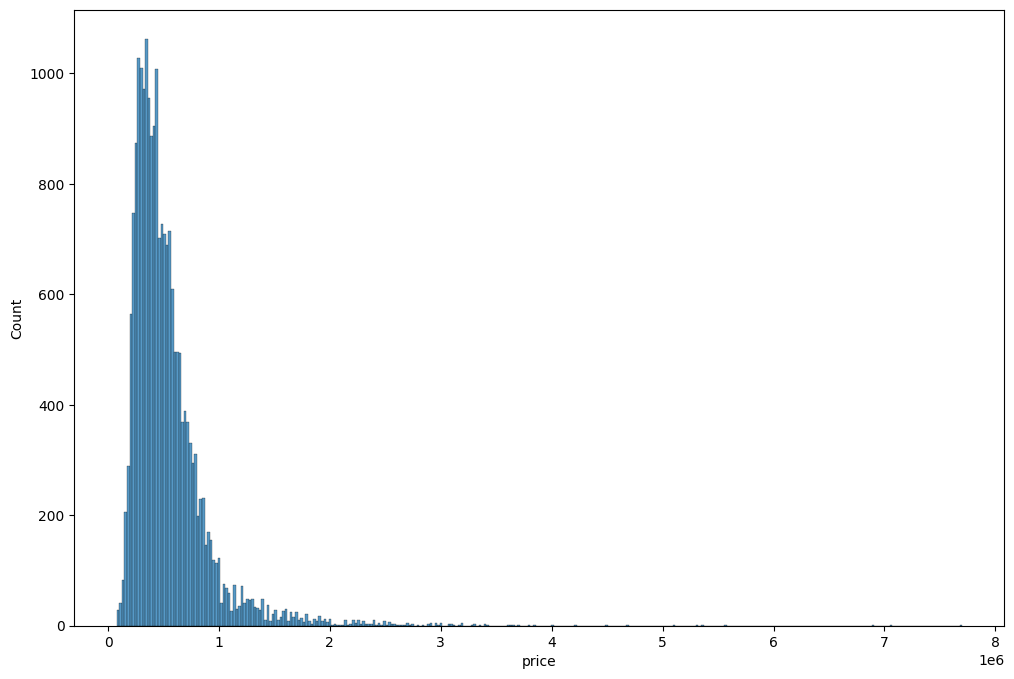

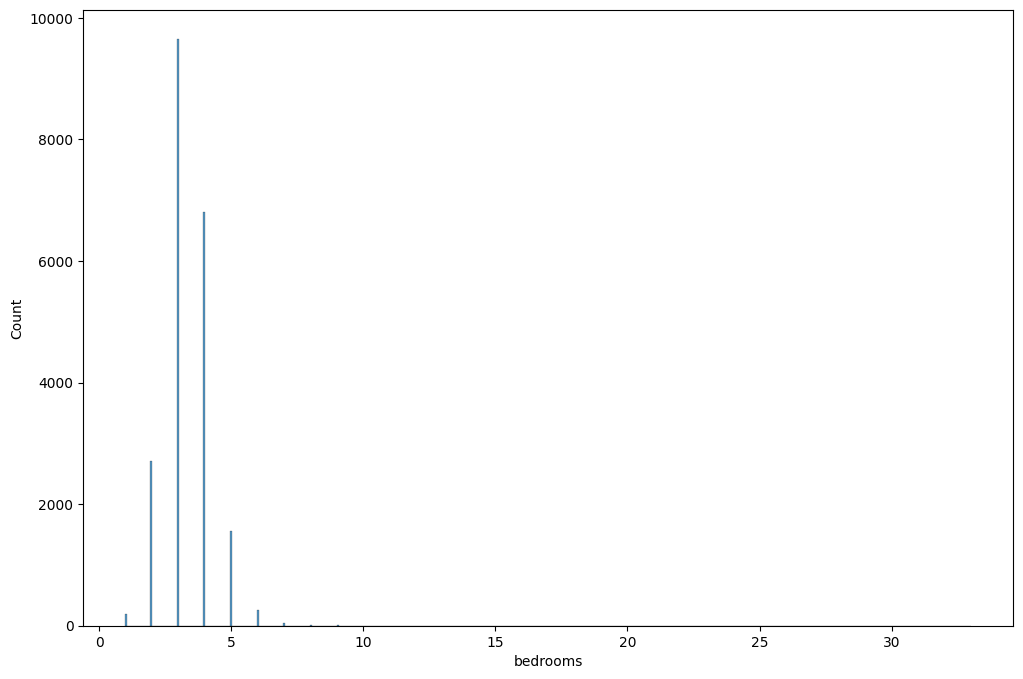

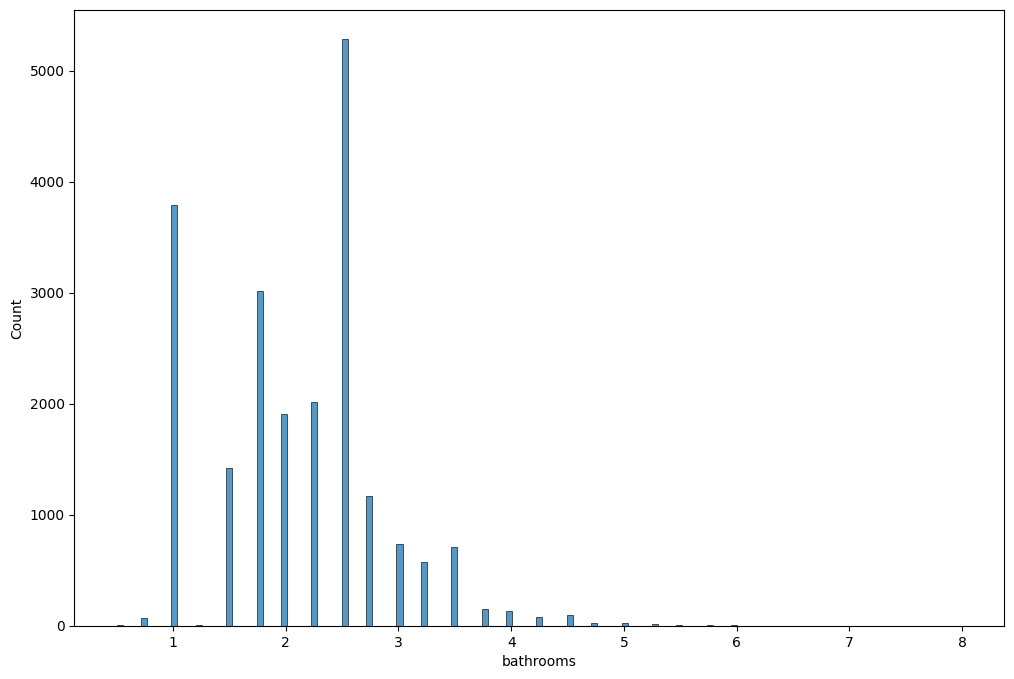

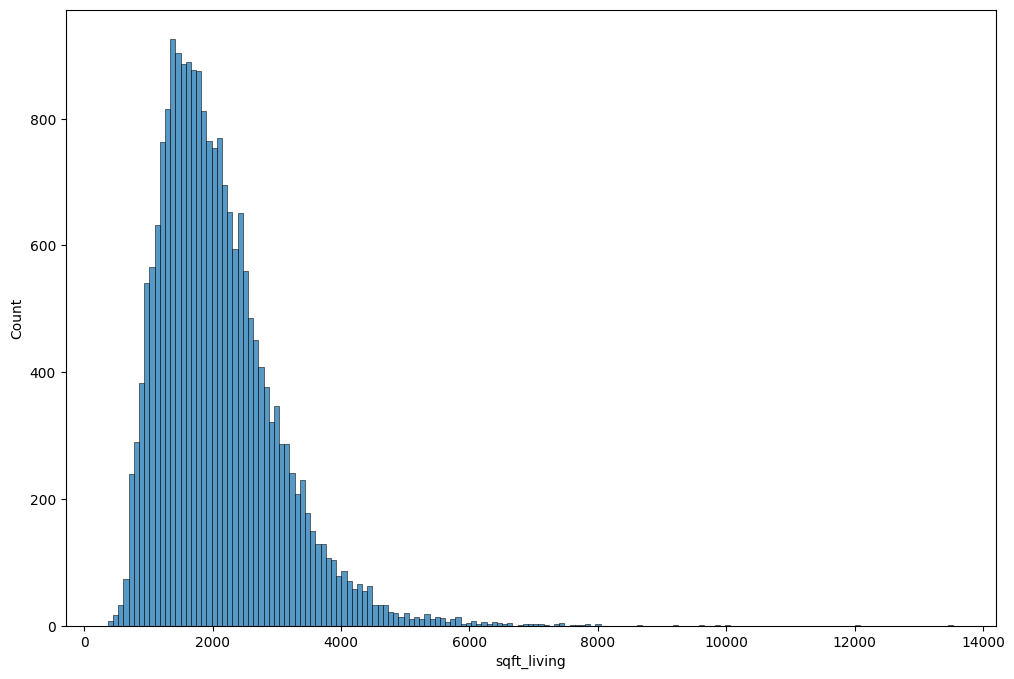

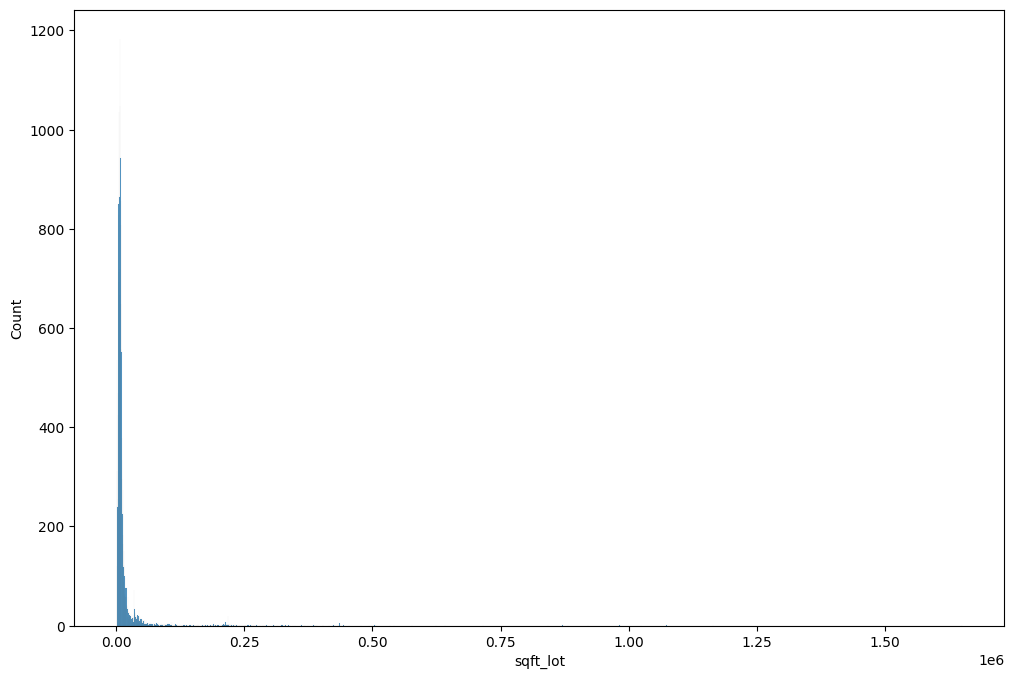

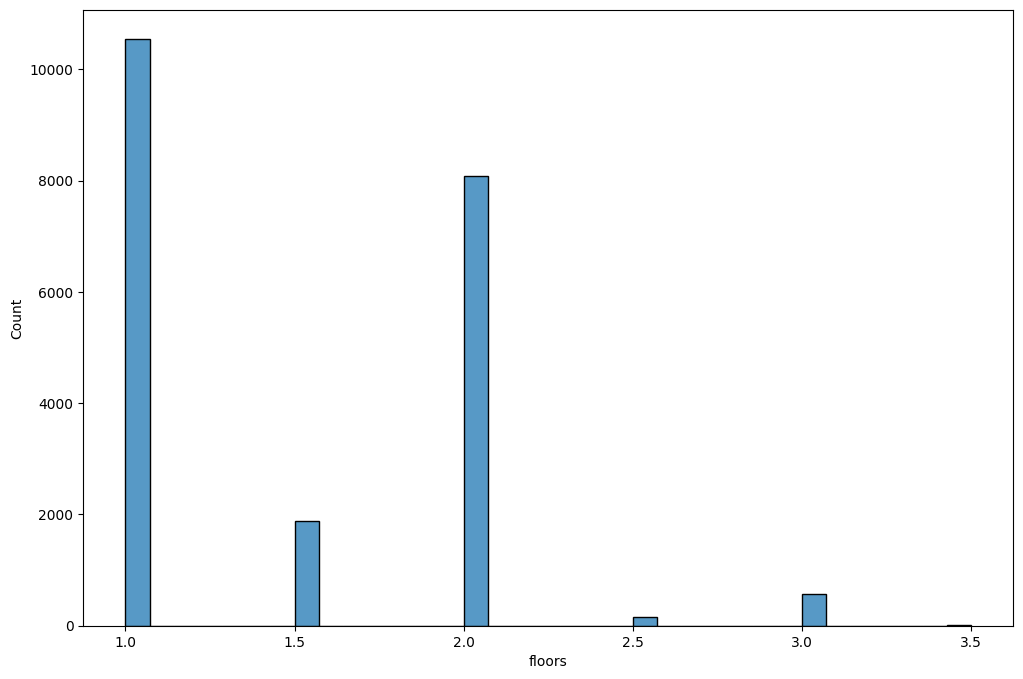

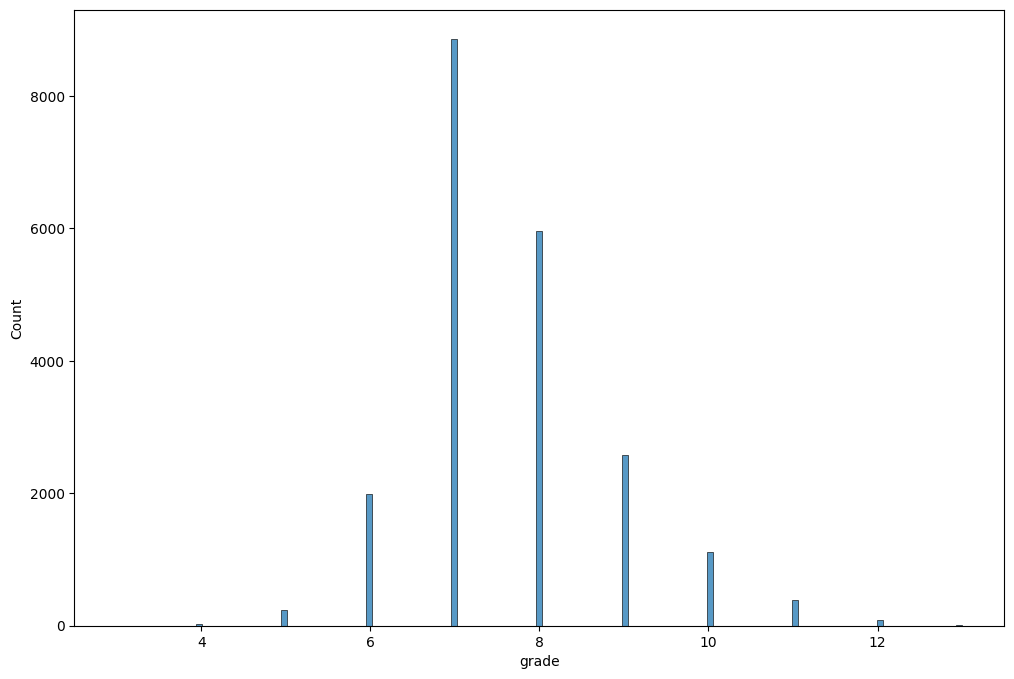

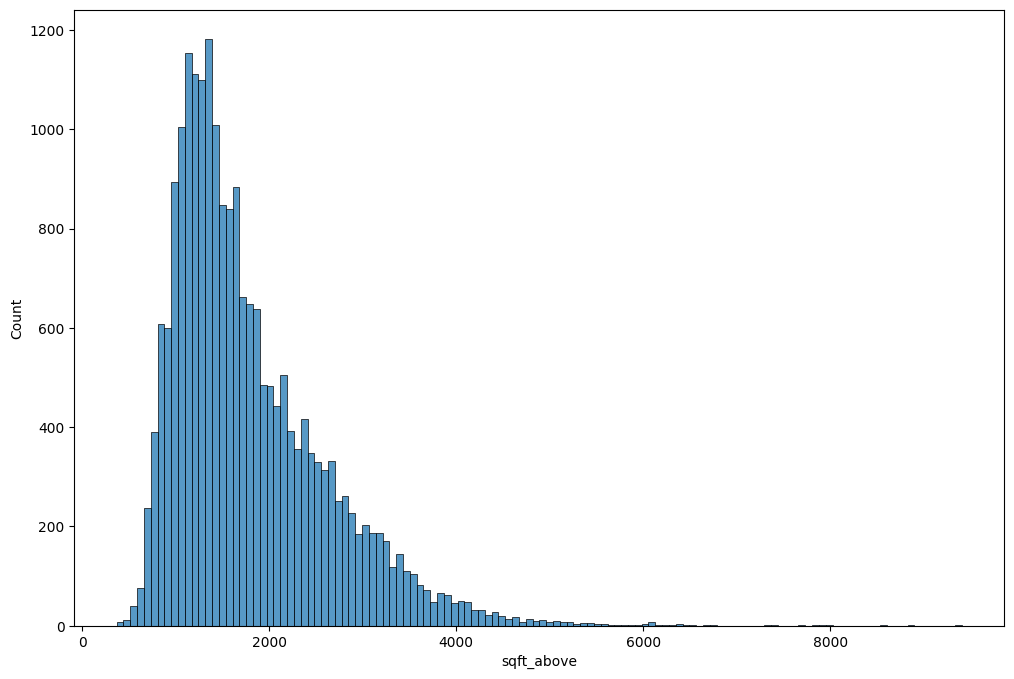

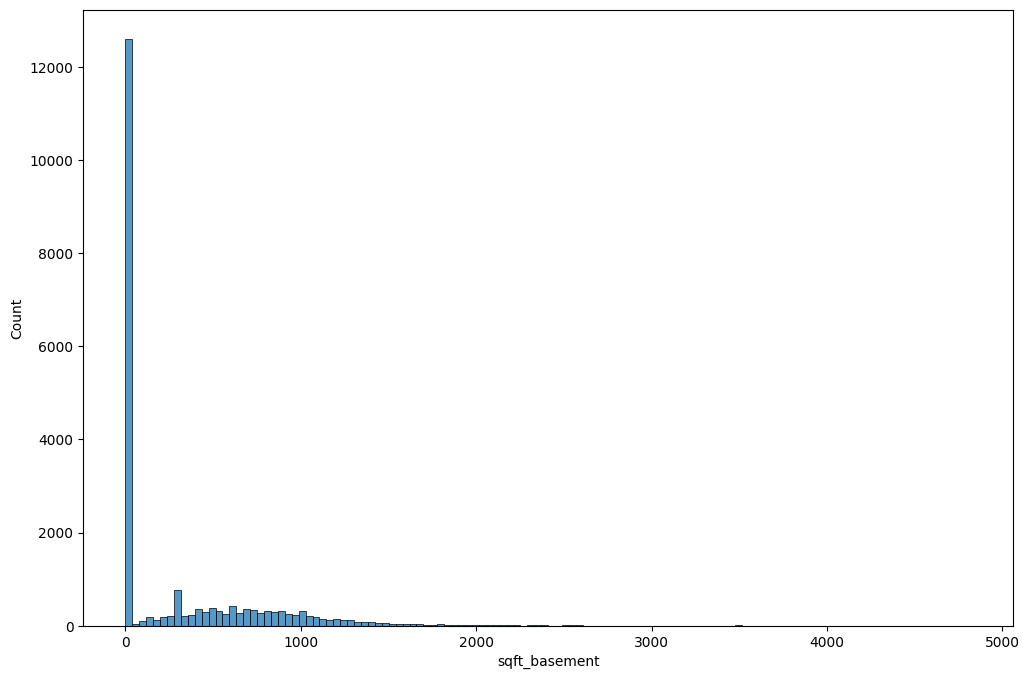

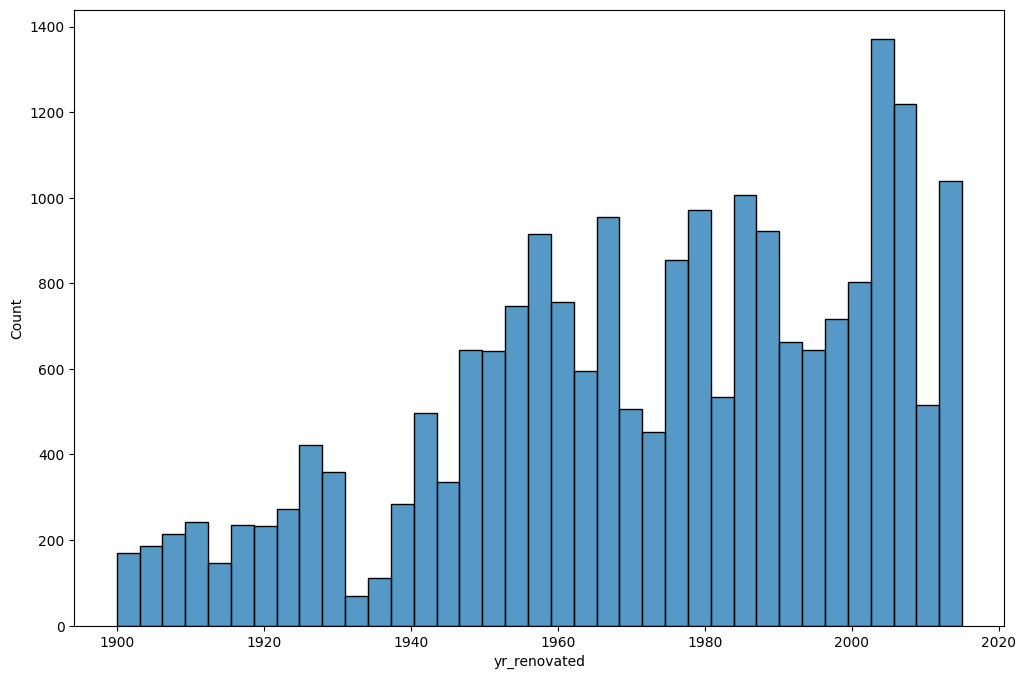

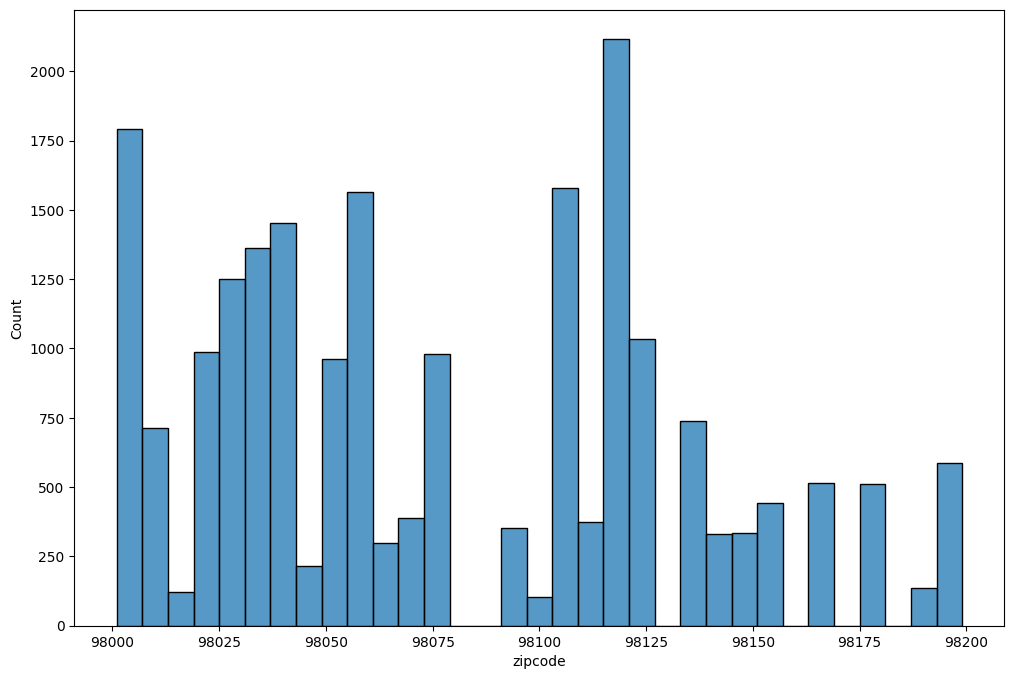

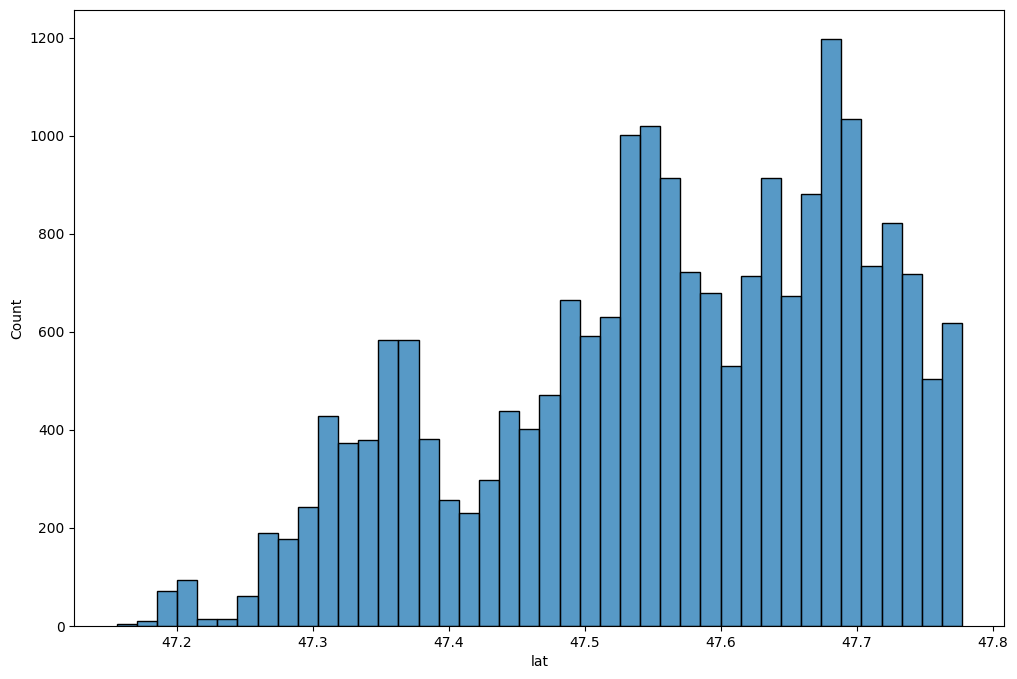

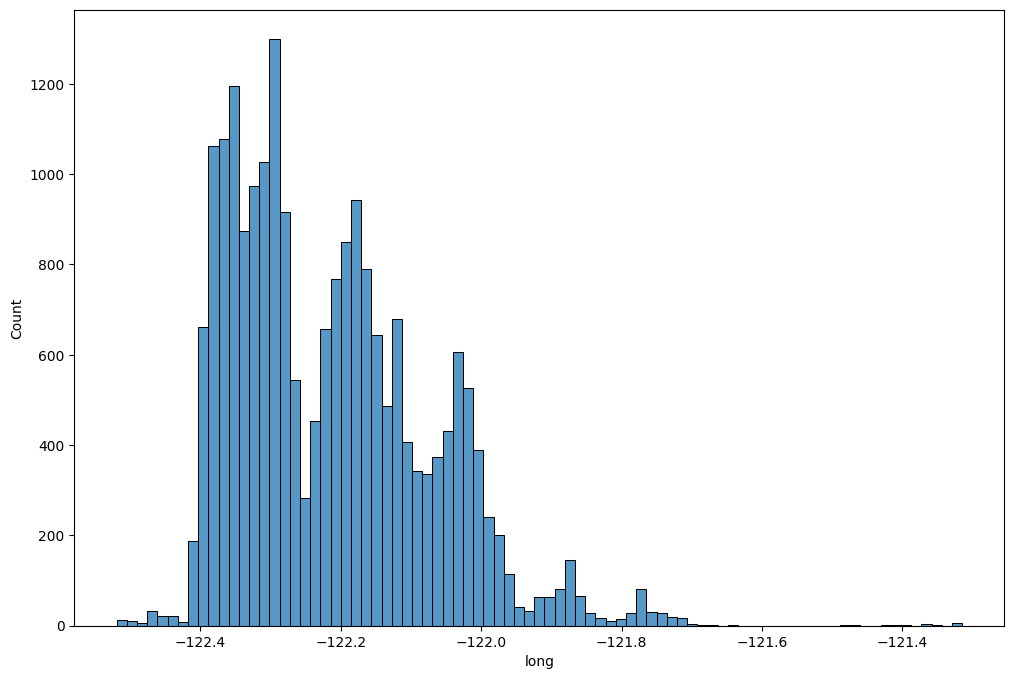

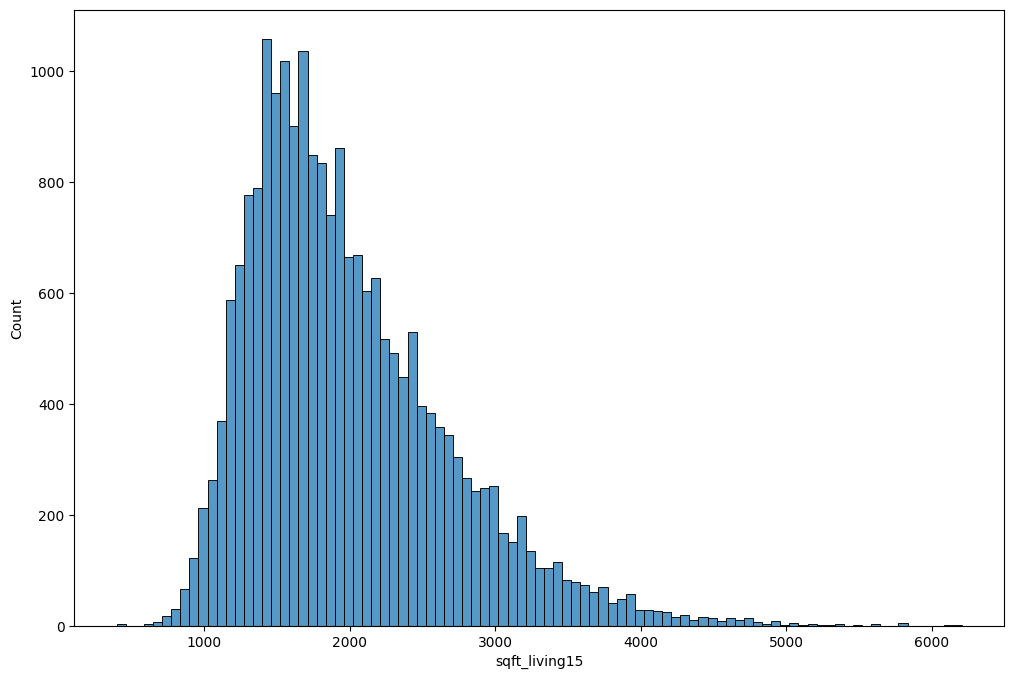

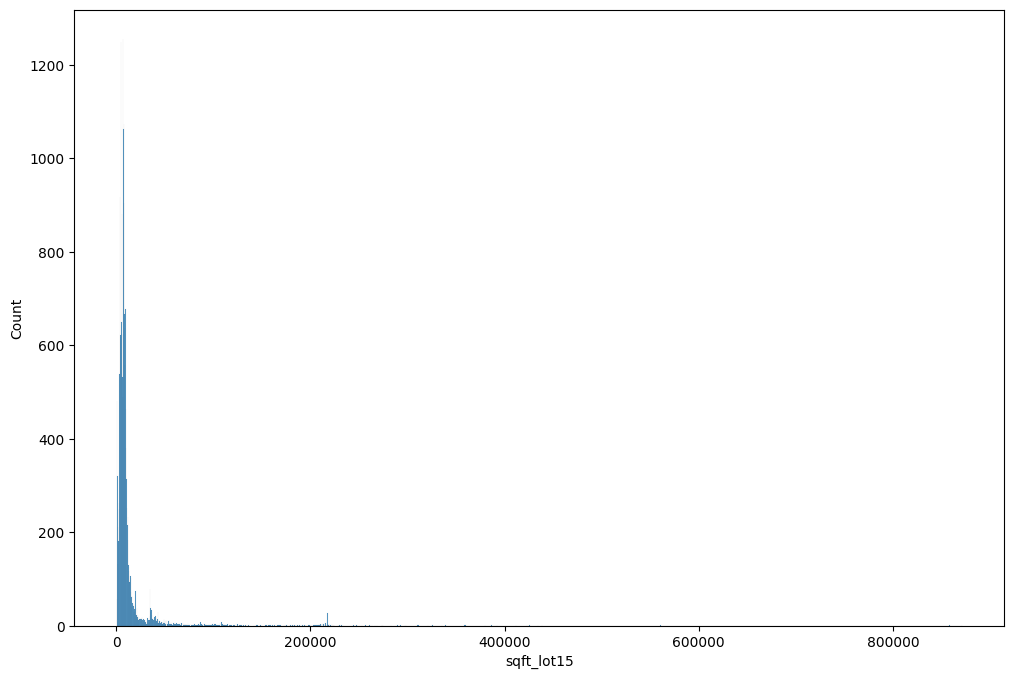

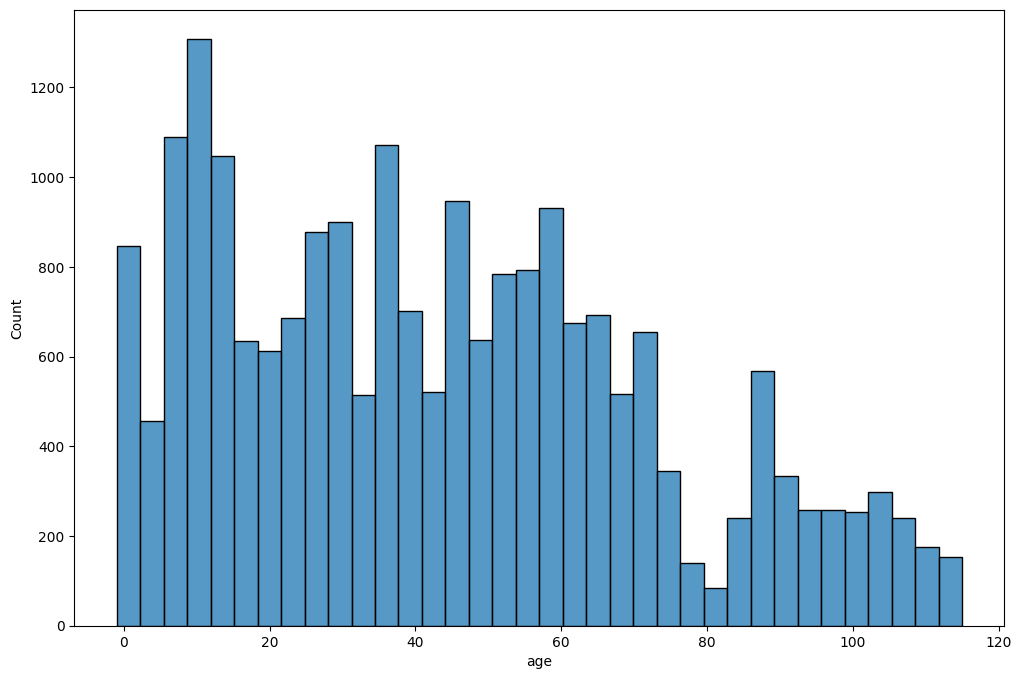

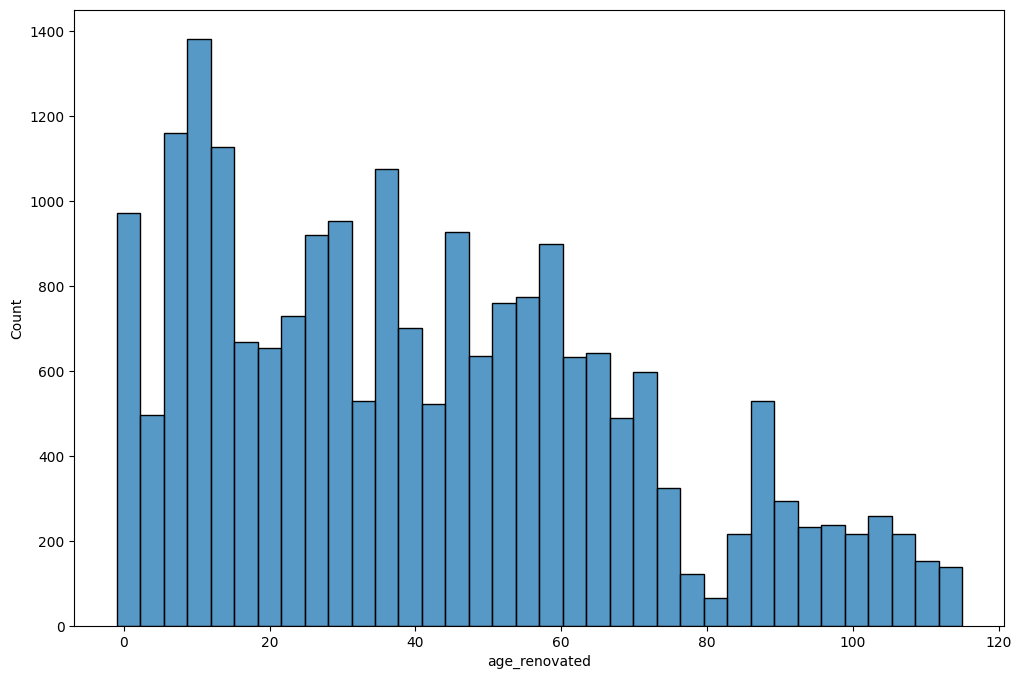

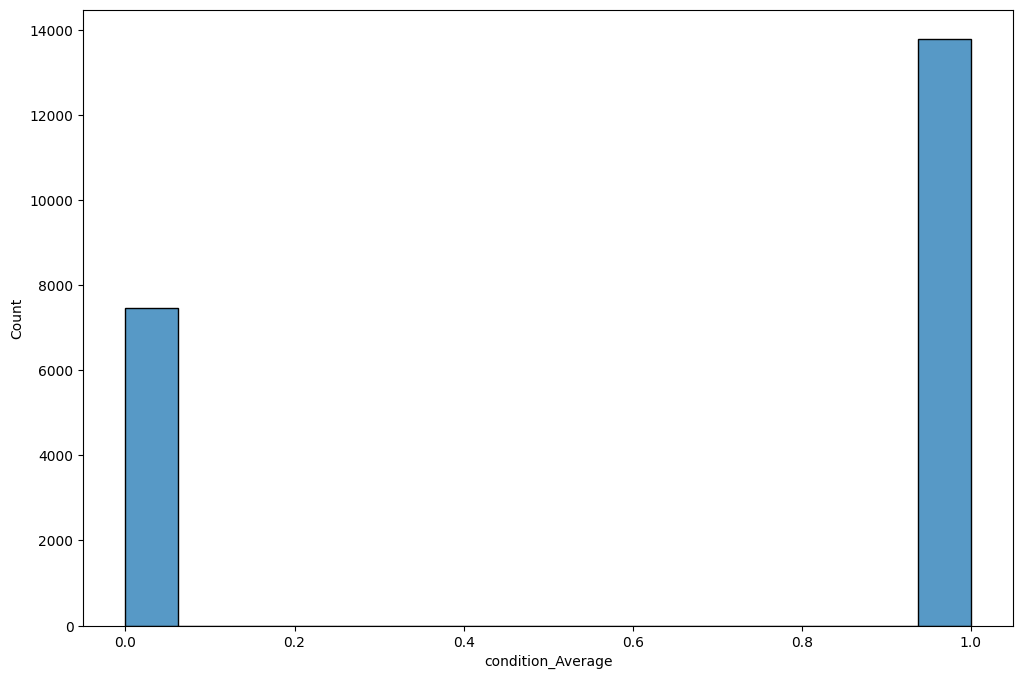

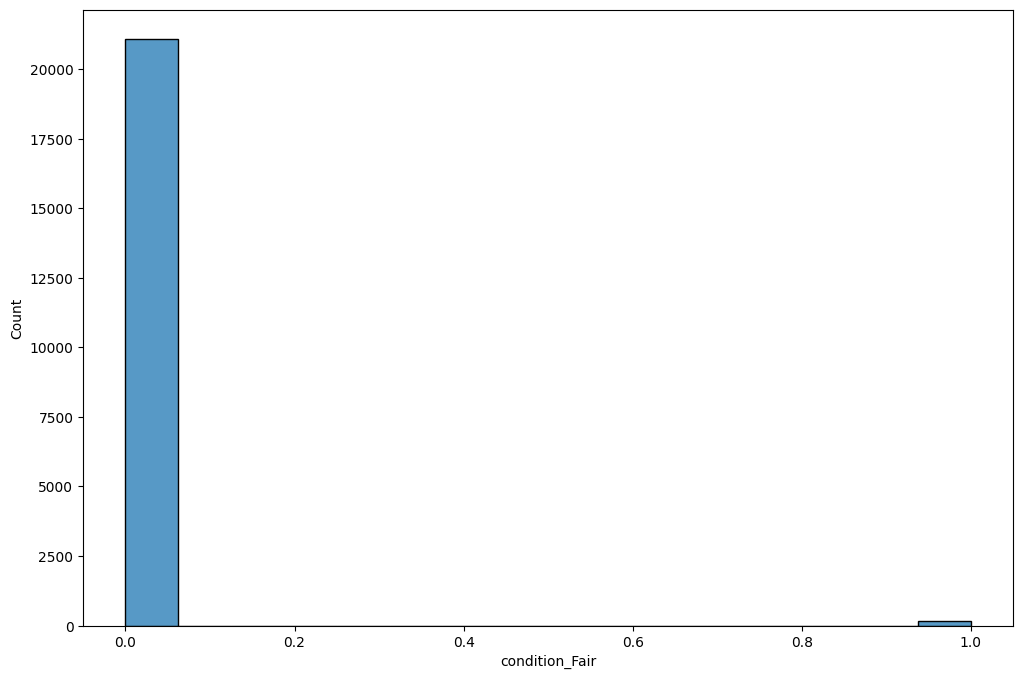

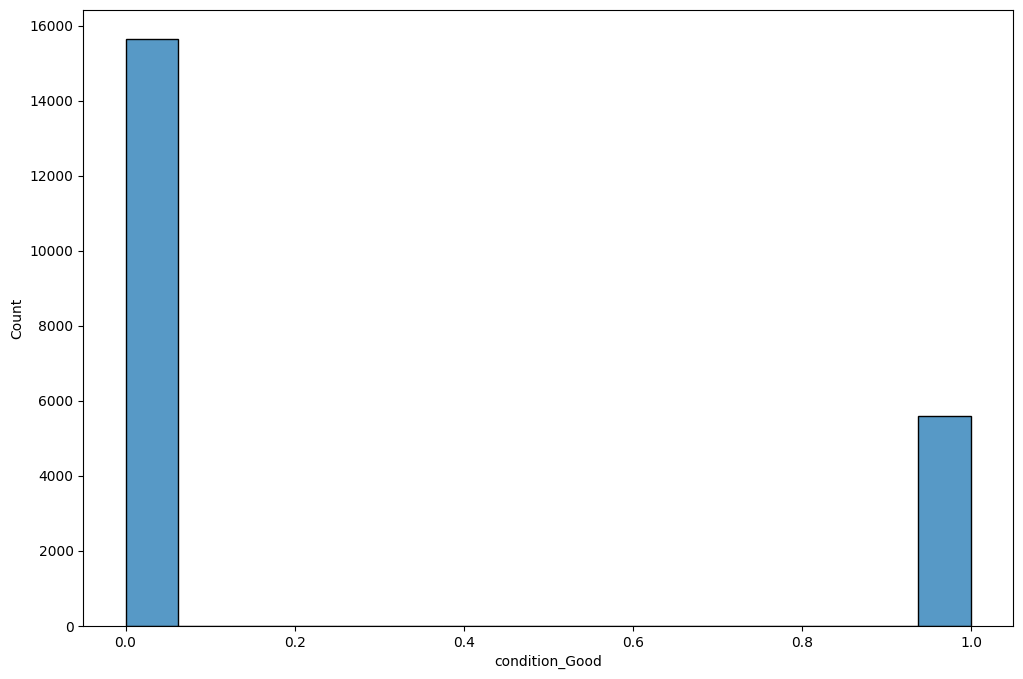

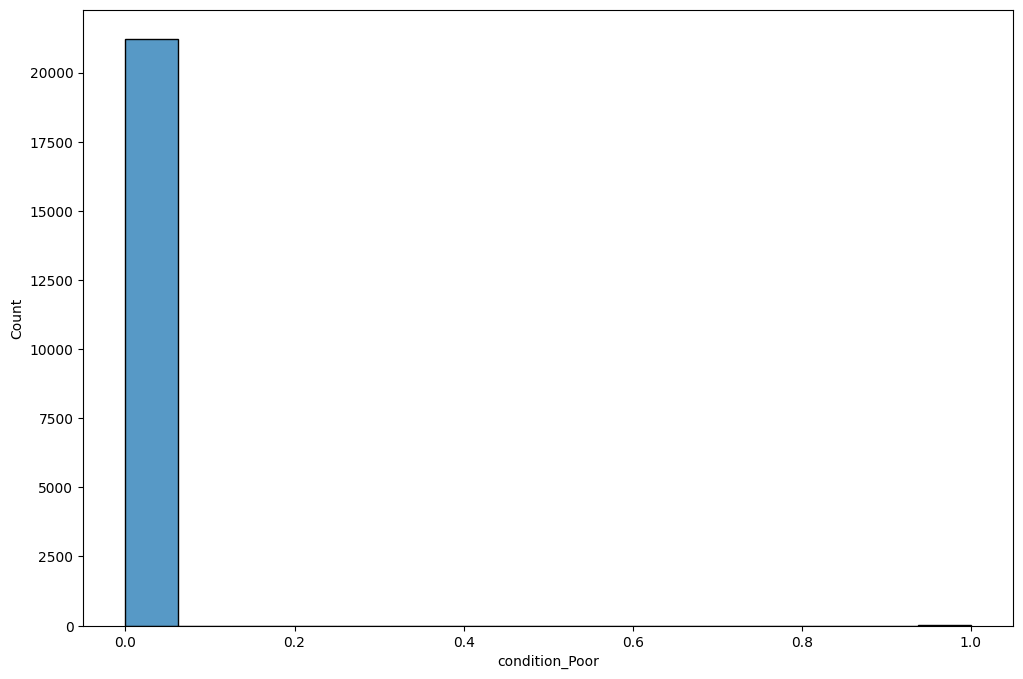

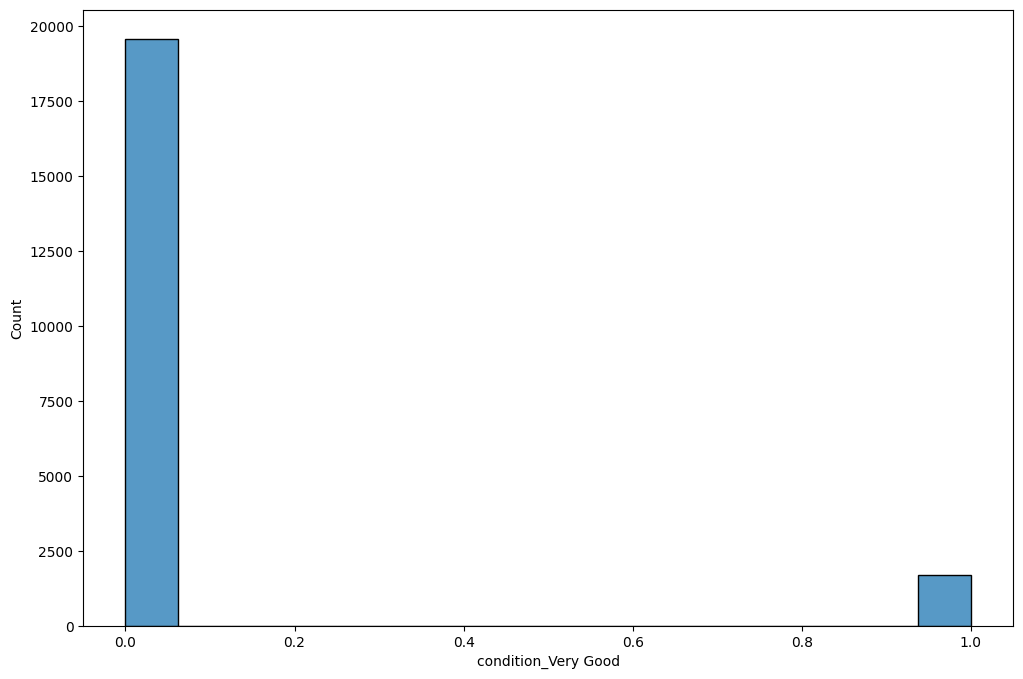

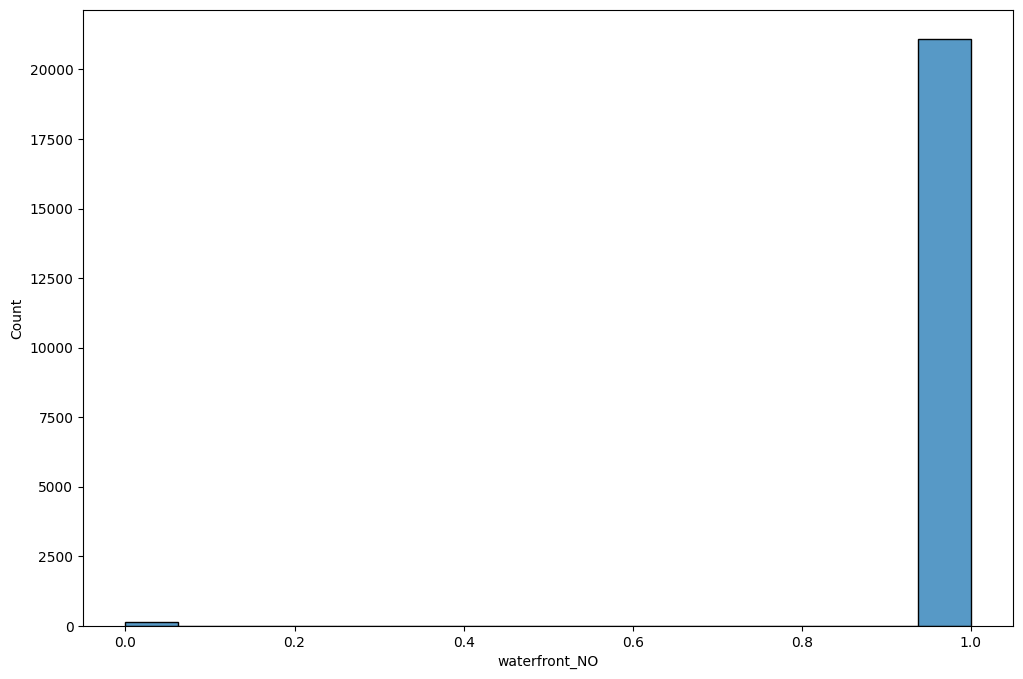

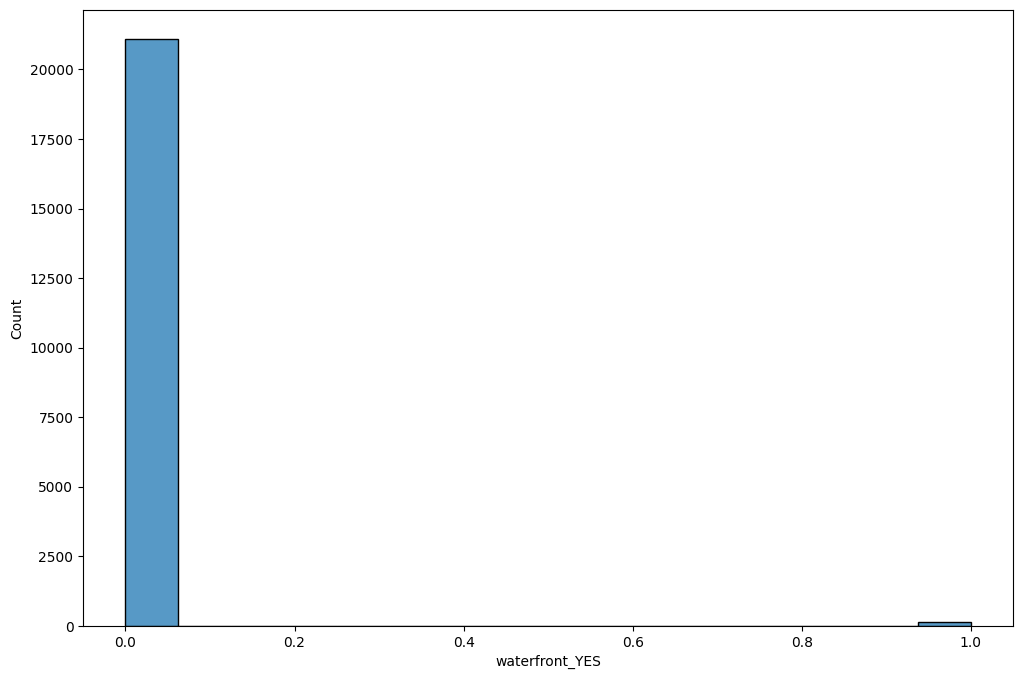

In [ ]:
#View distribution plots for all columns
for col in house_df2_final.columns:
    plt.subplots(1, 1)
    sns.histplot(house_df2_final[col])

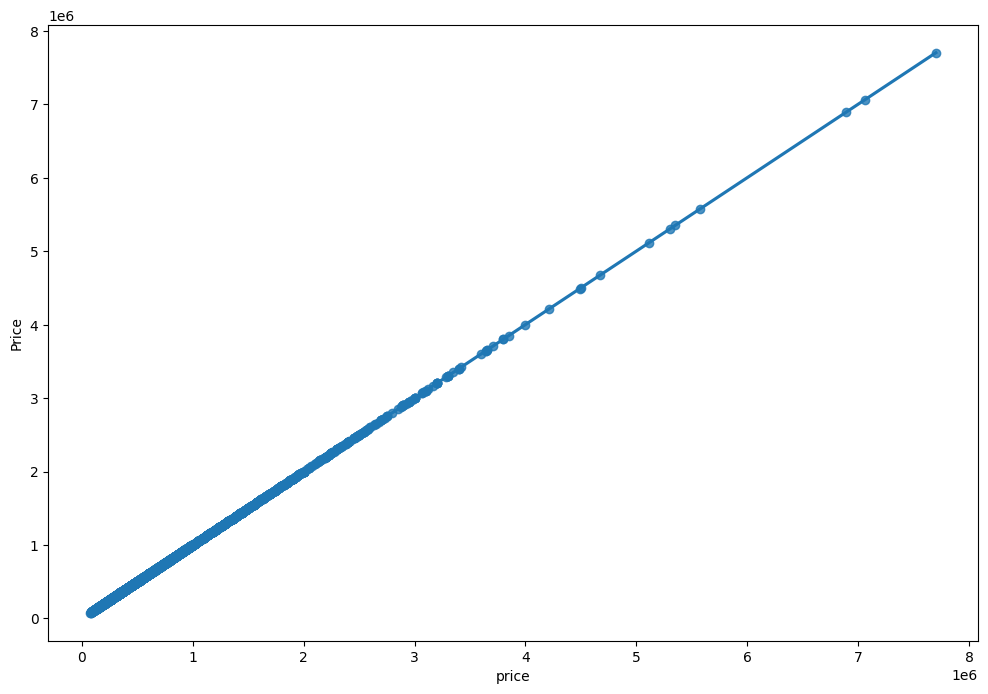

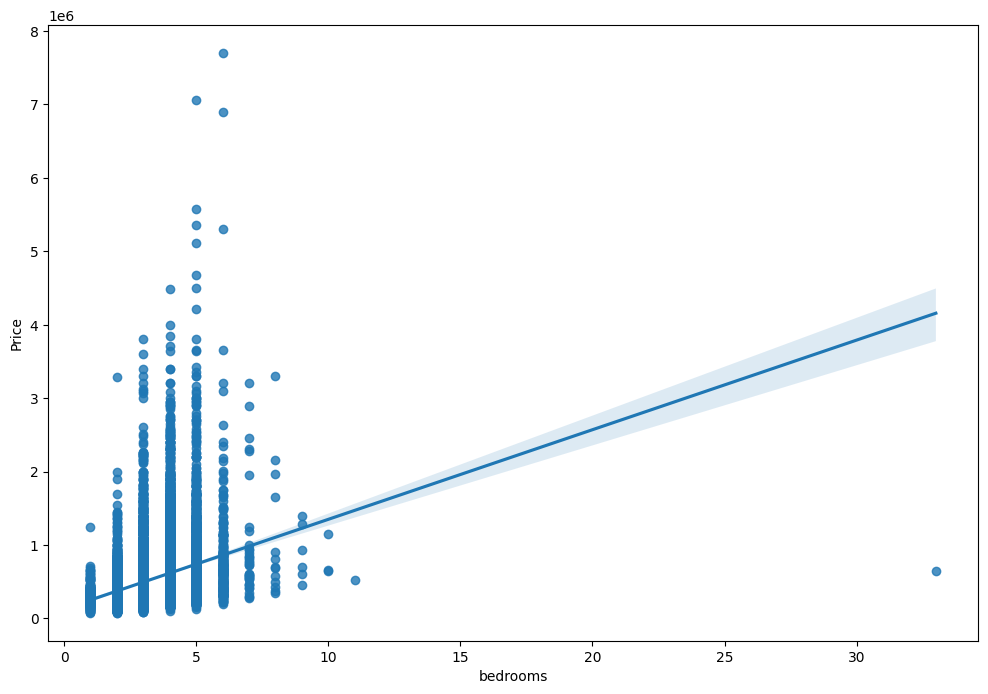

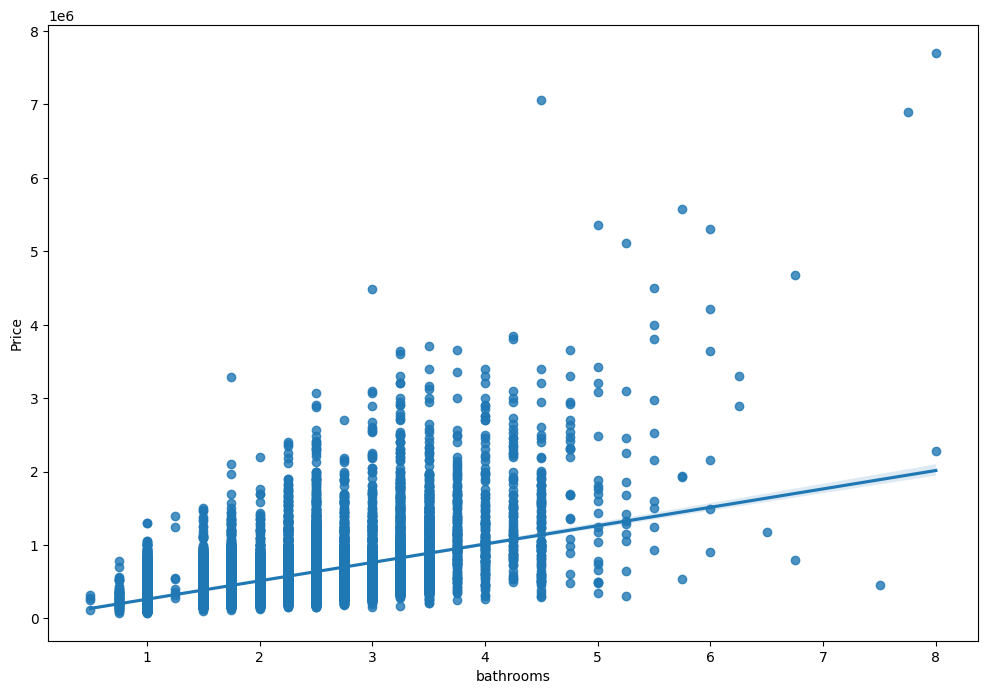

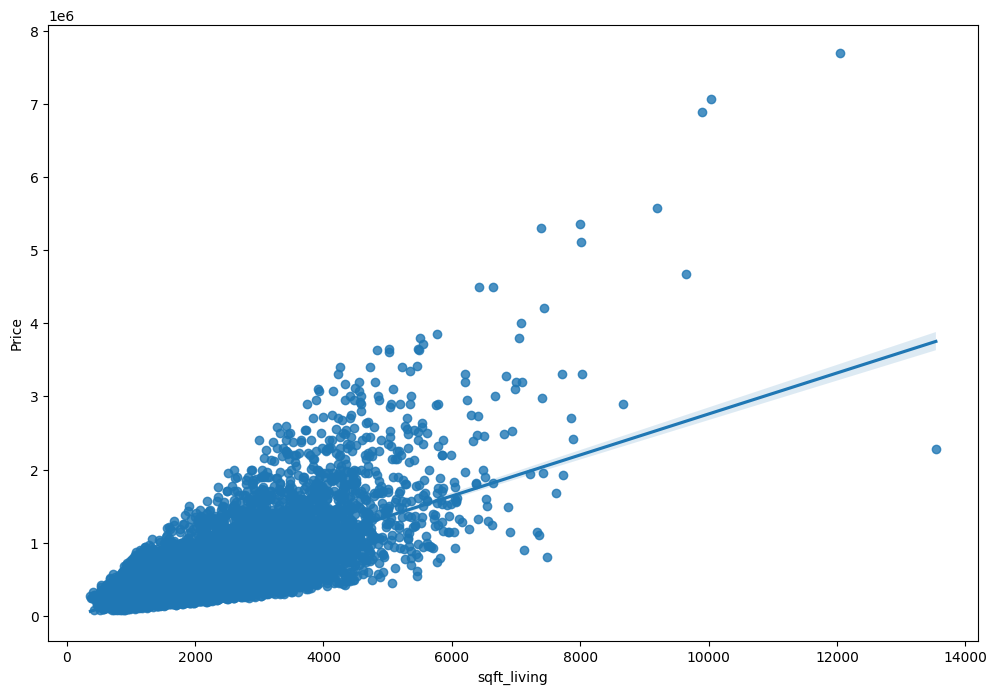

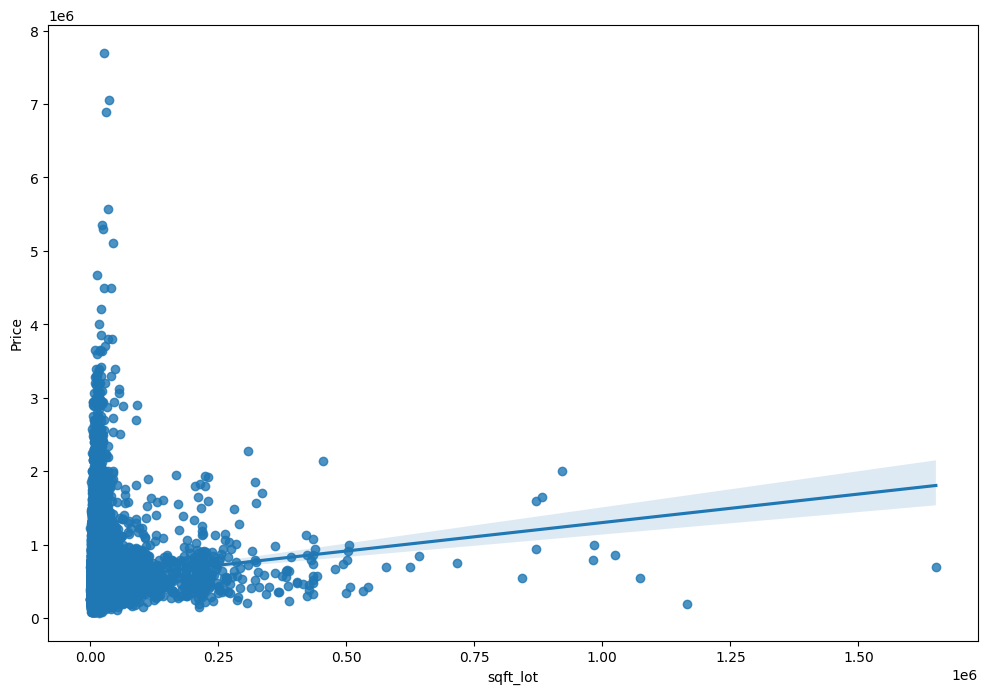

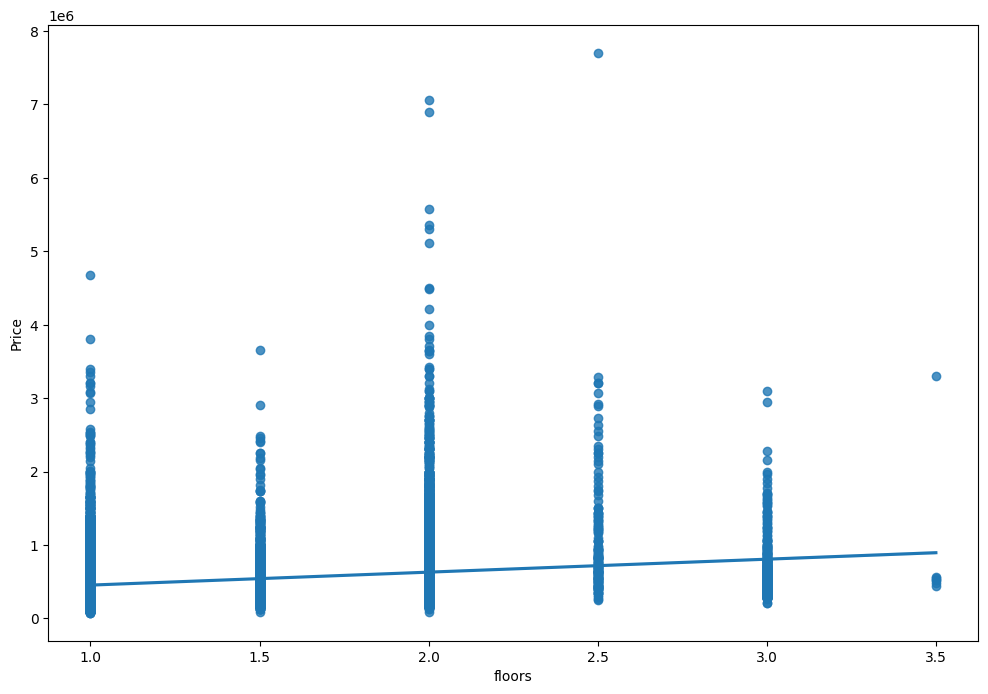

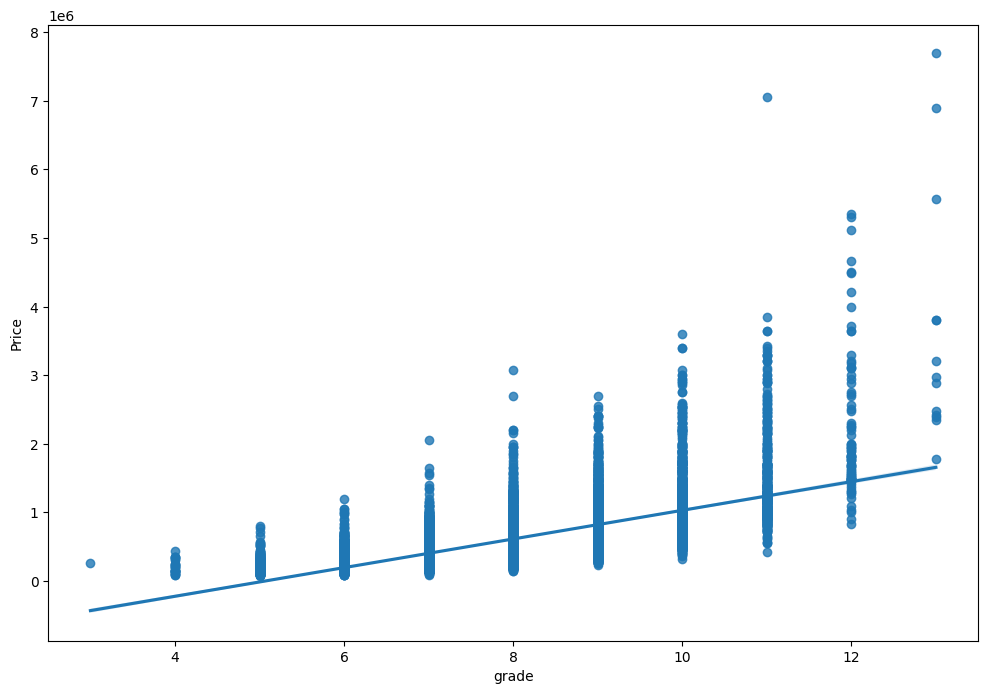

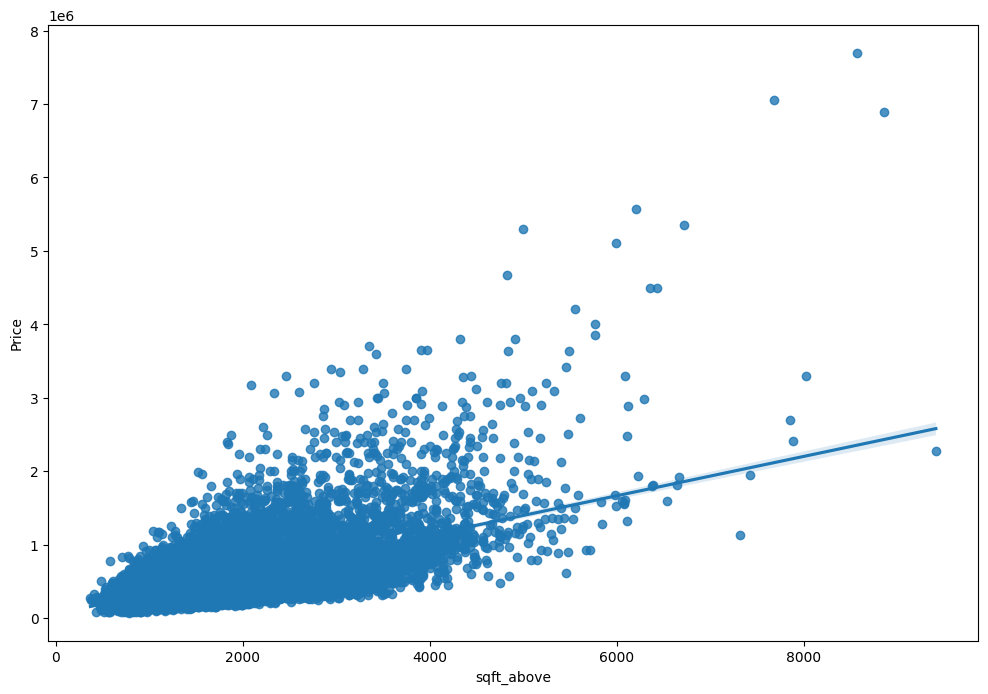

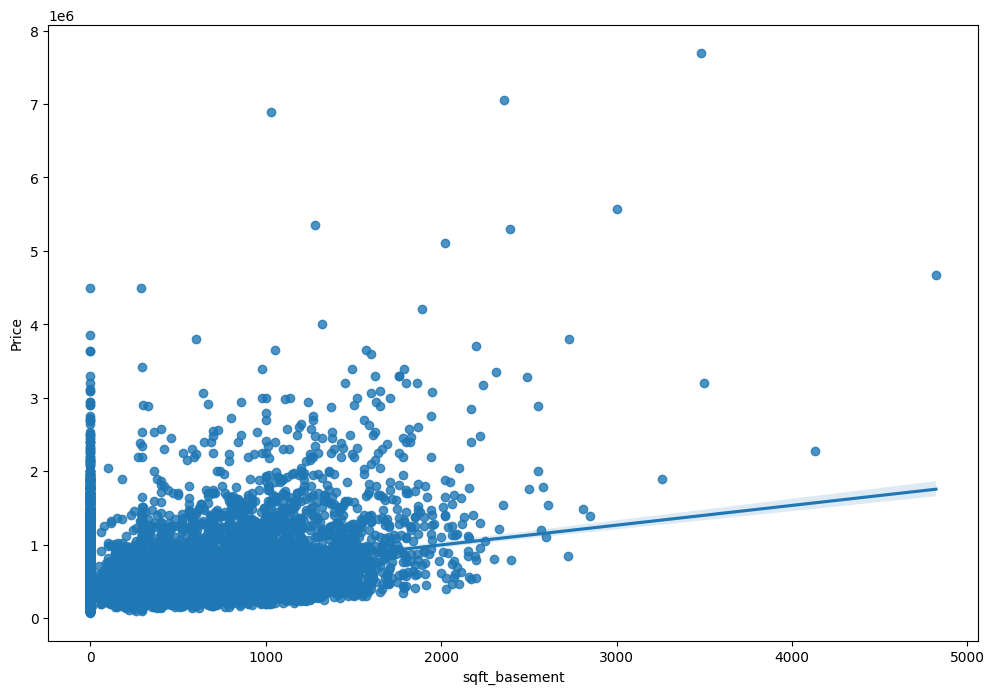

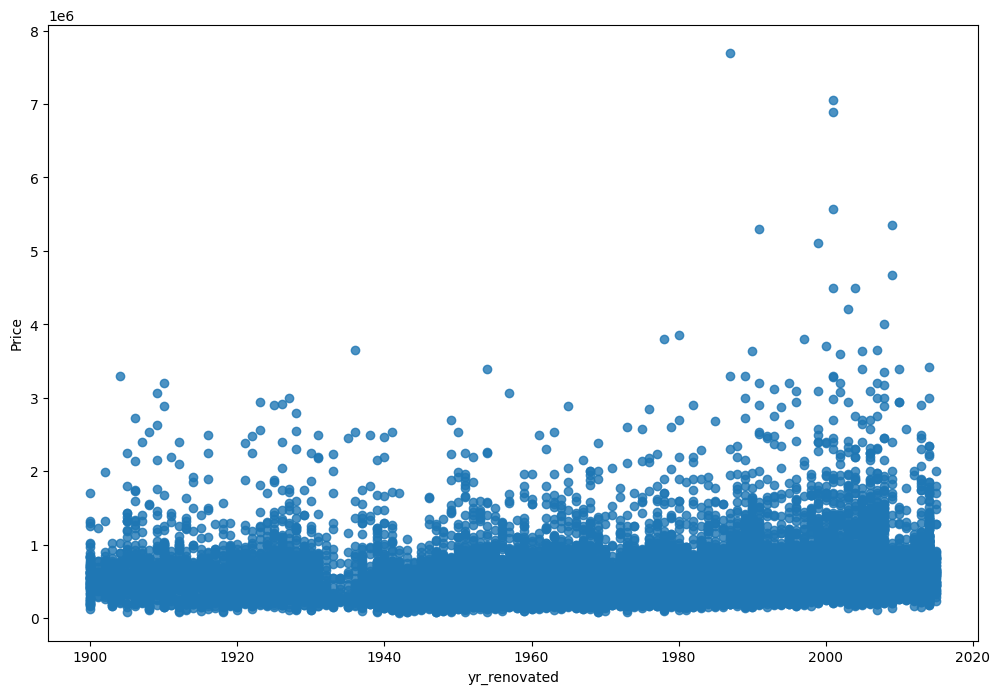

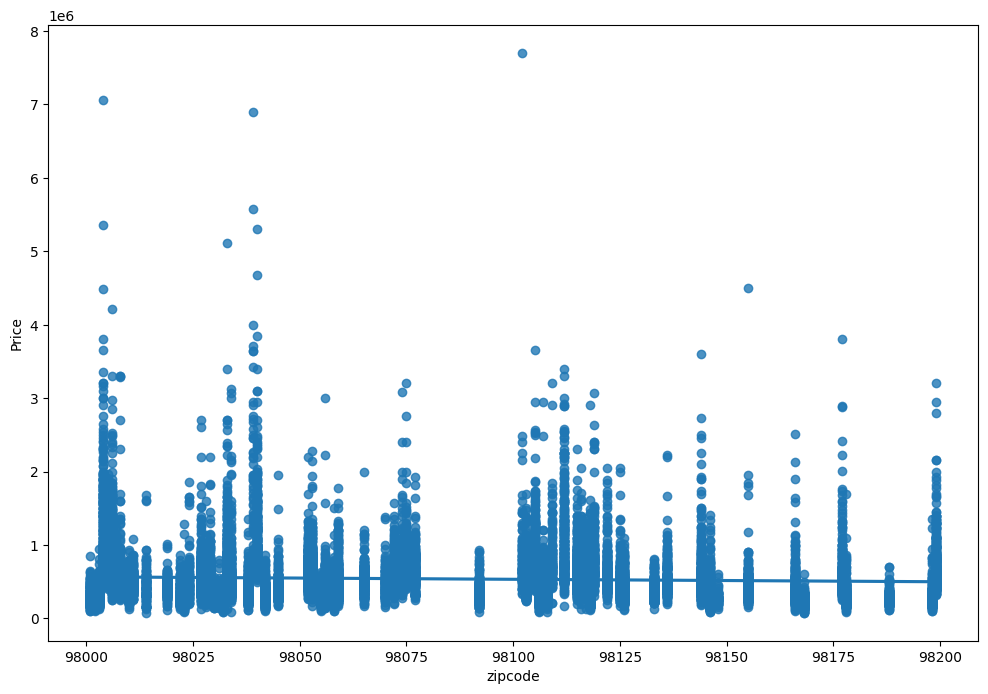

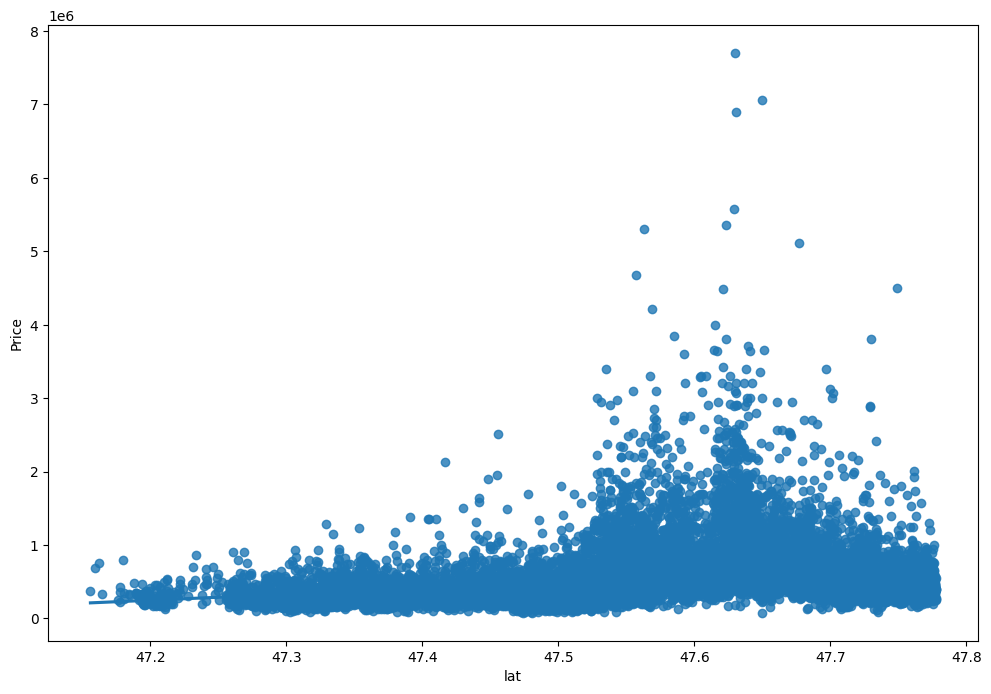

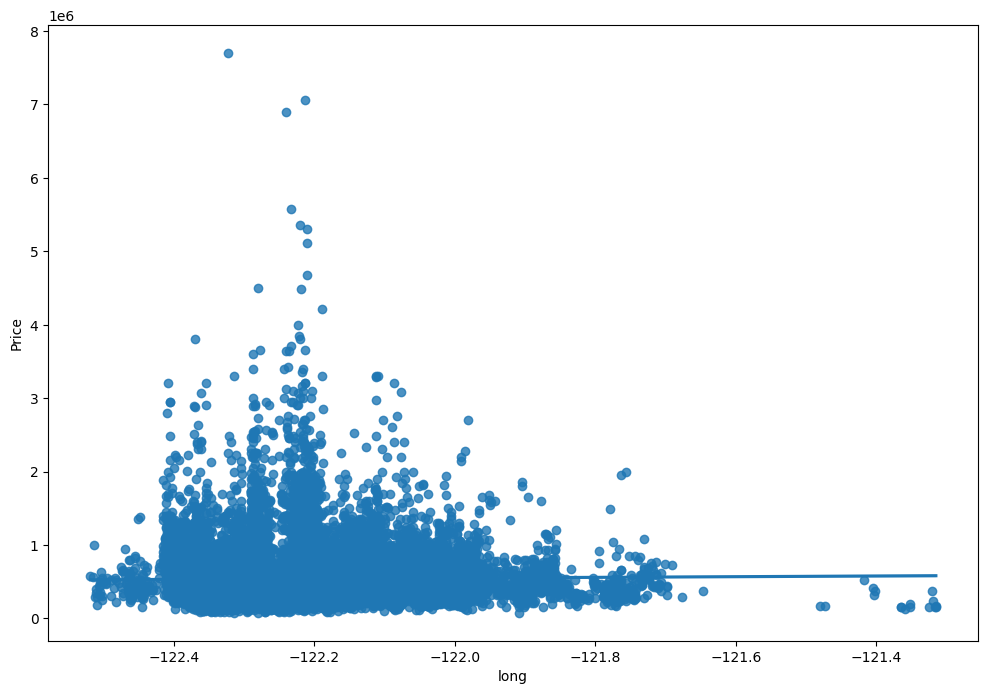

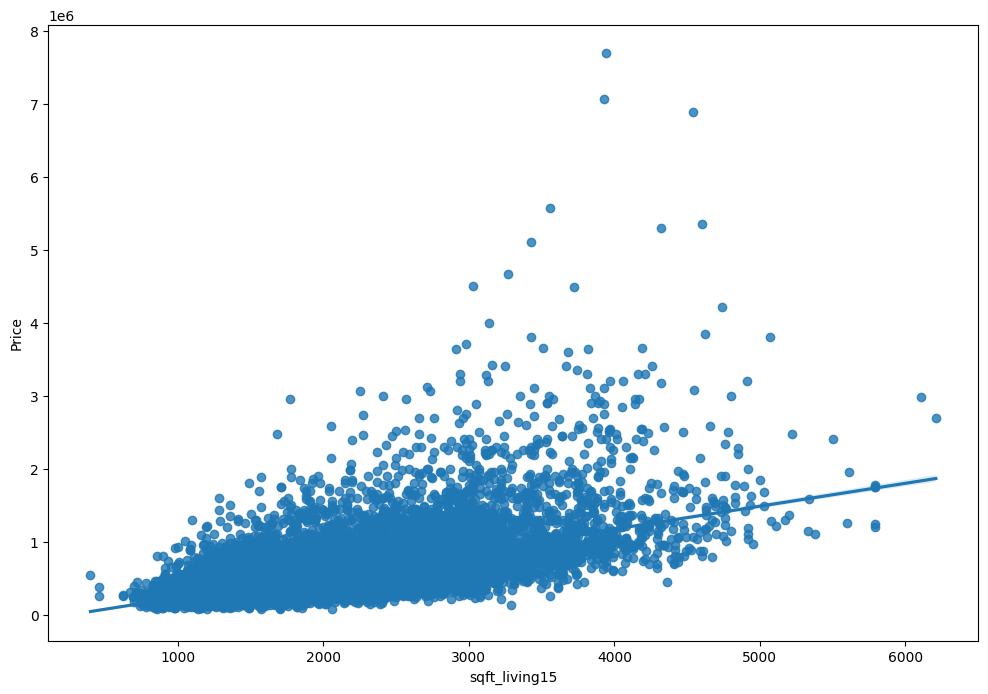

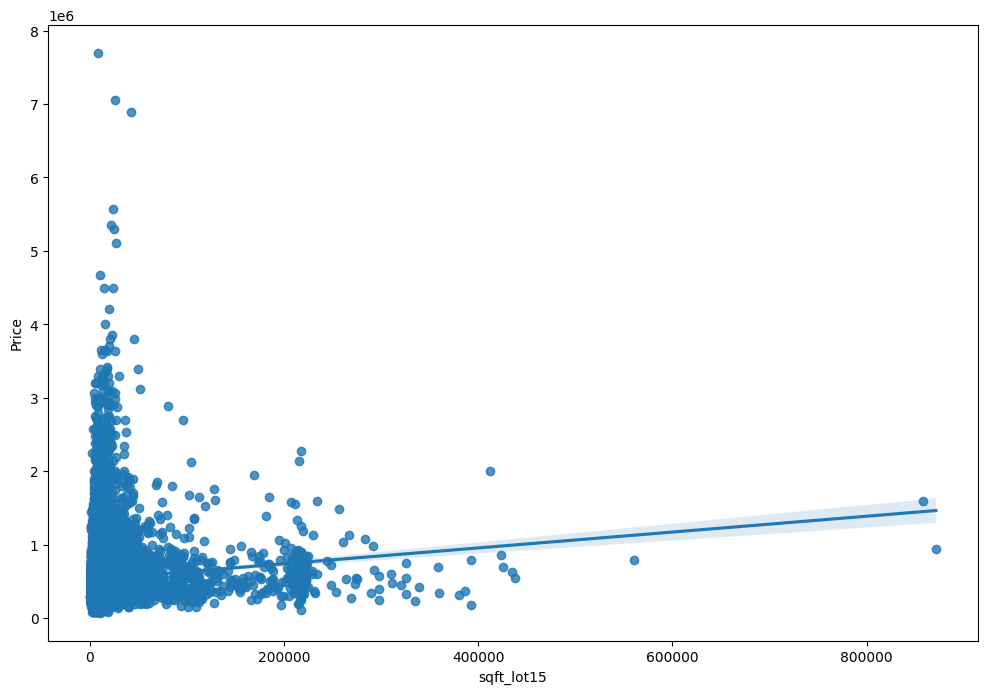

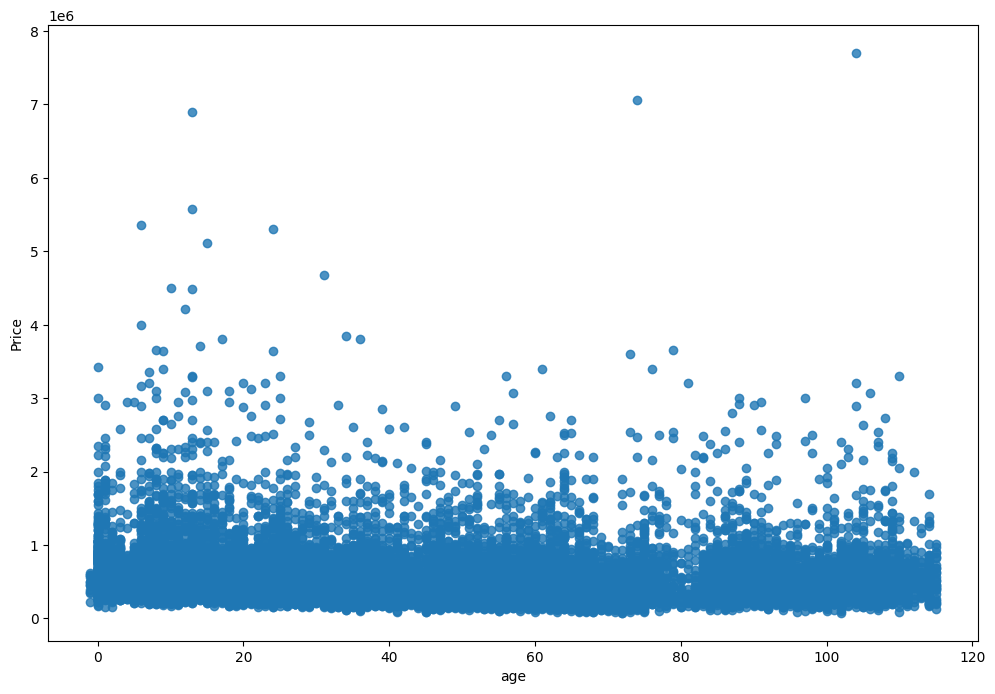

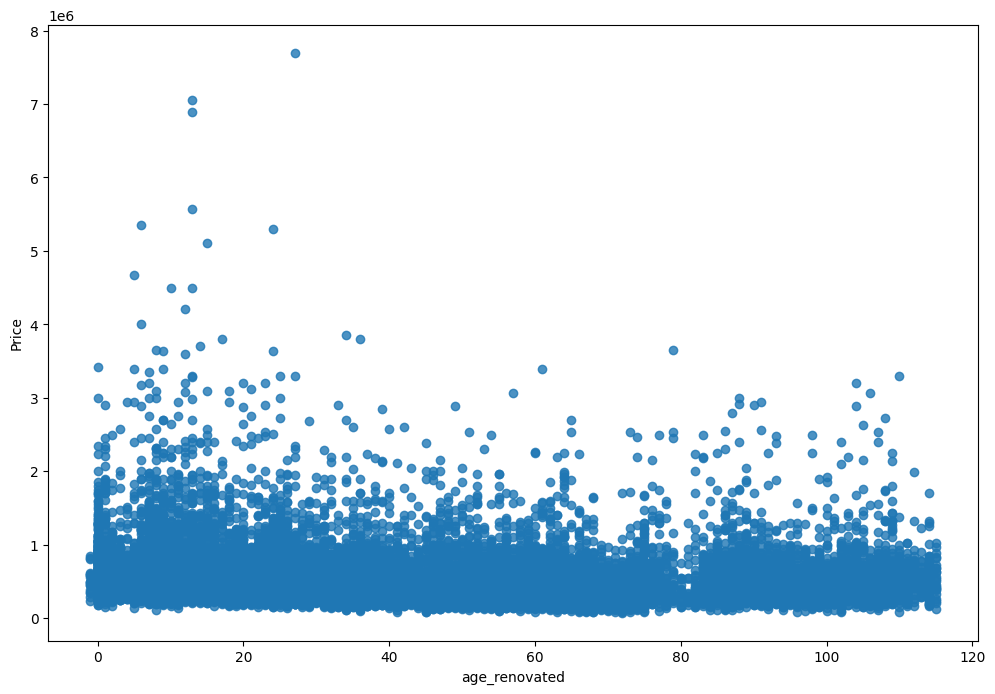

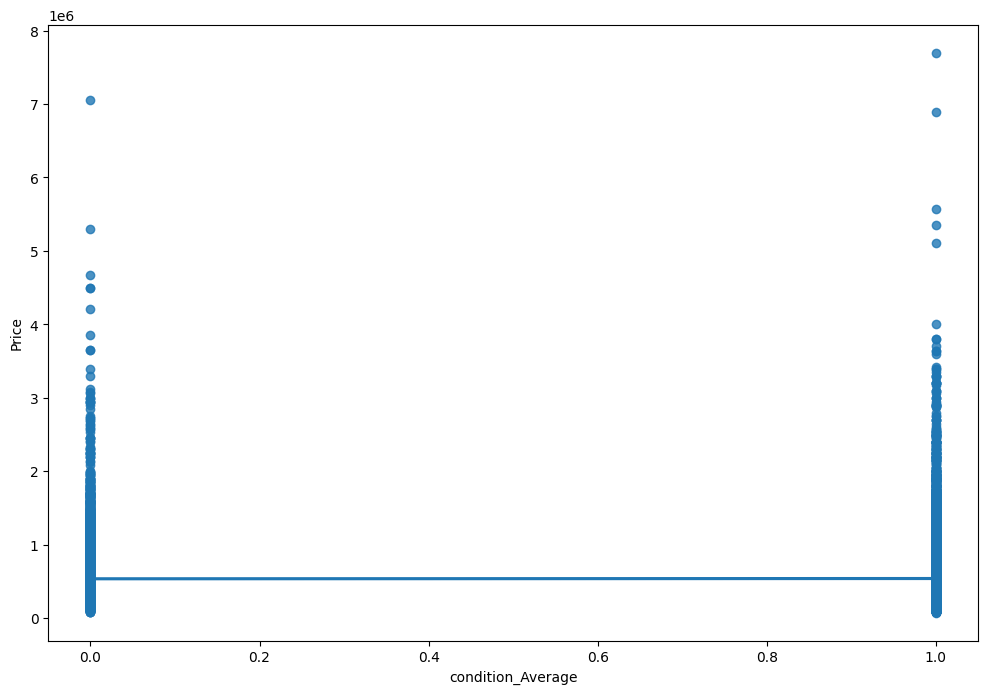

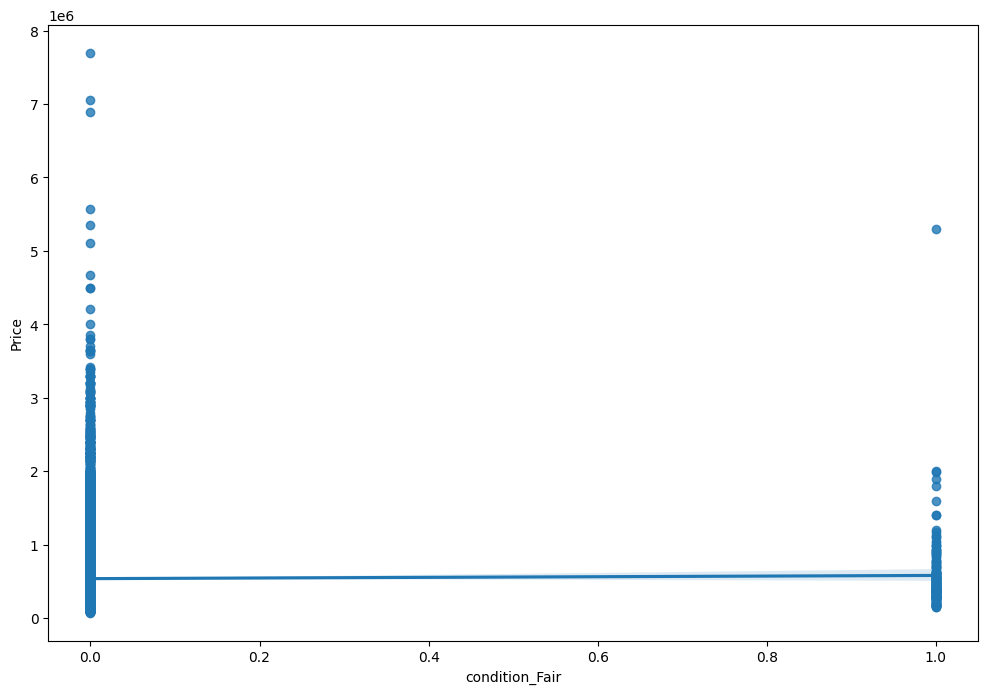

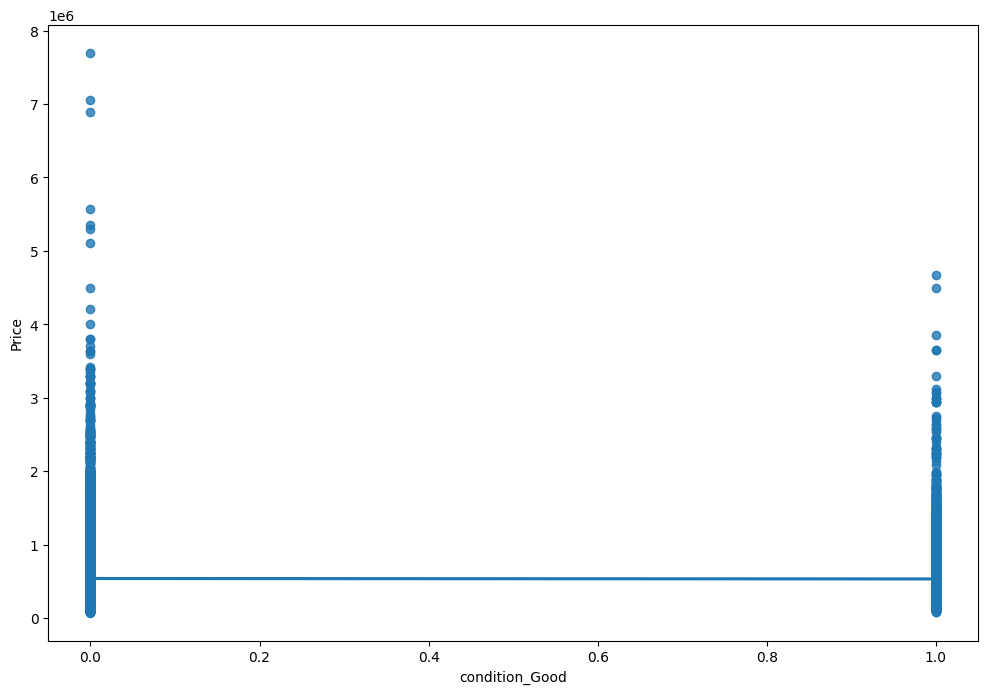

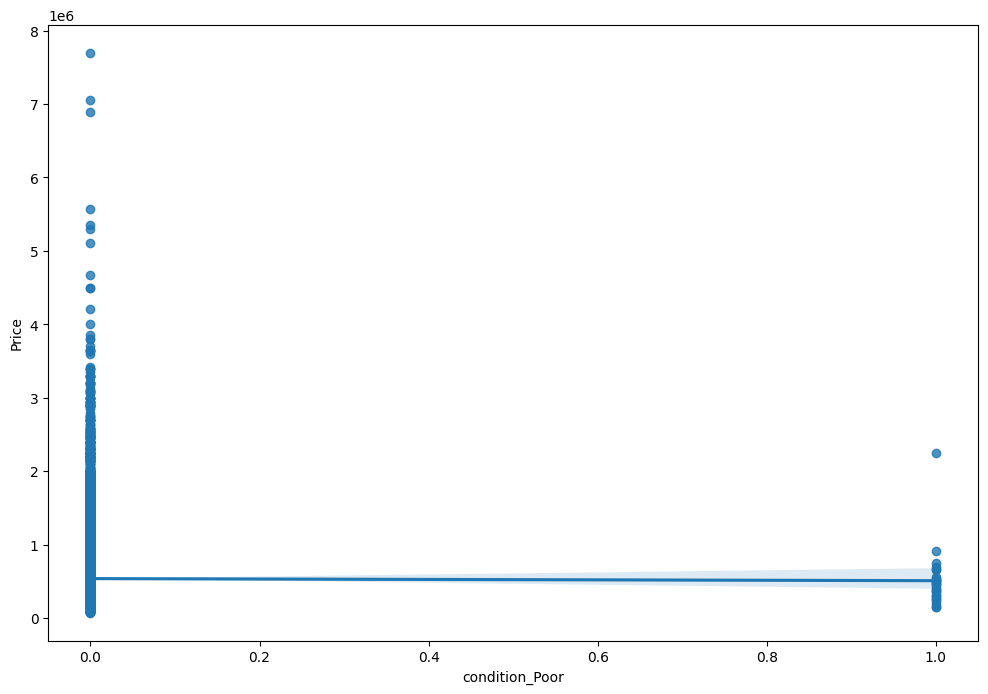

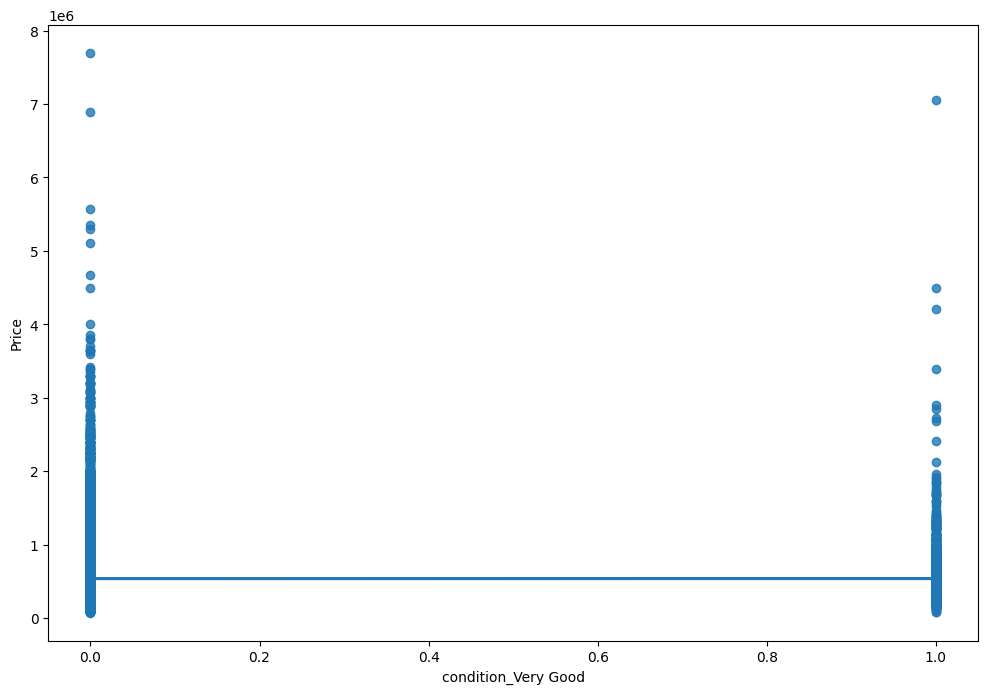

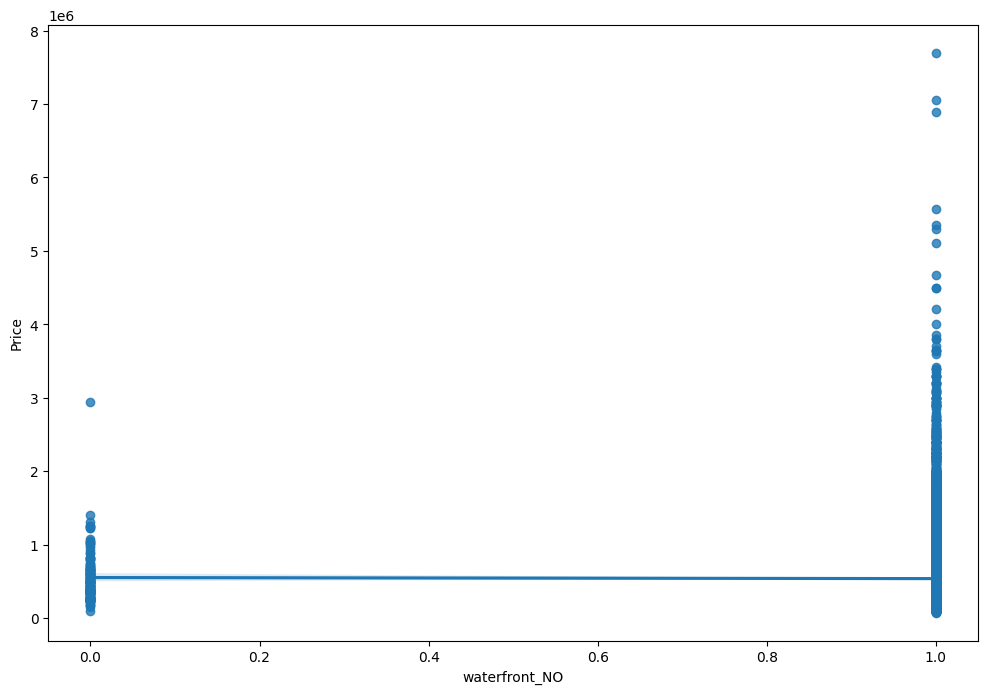

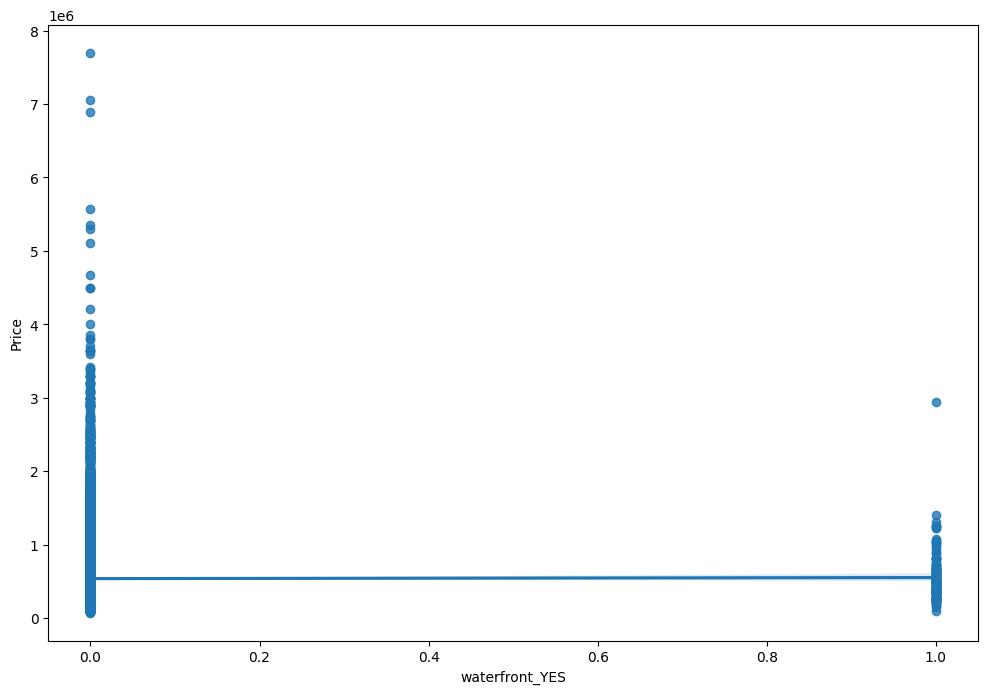

In [ ]:
### checking for a simple vizual regression 
for col in house_df2_final.columns:
    plt.subplots(1, 1)
    sns.regplot(x=col, y='price', data=house_df2_final)
    plt.xlabel(col)
    plt.ylabel('Price')
    plt.show()

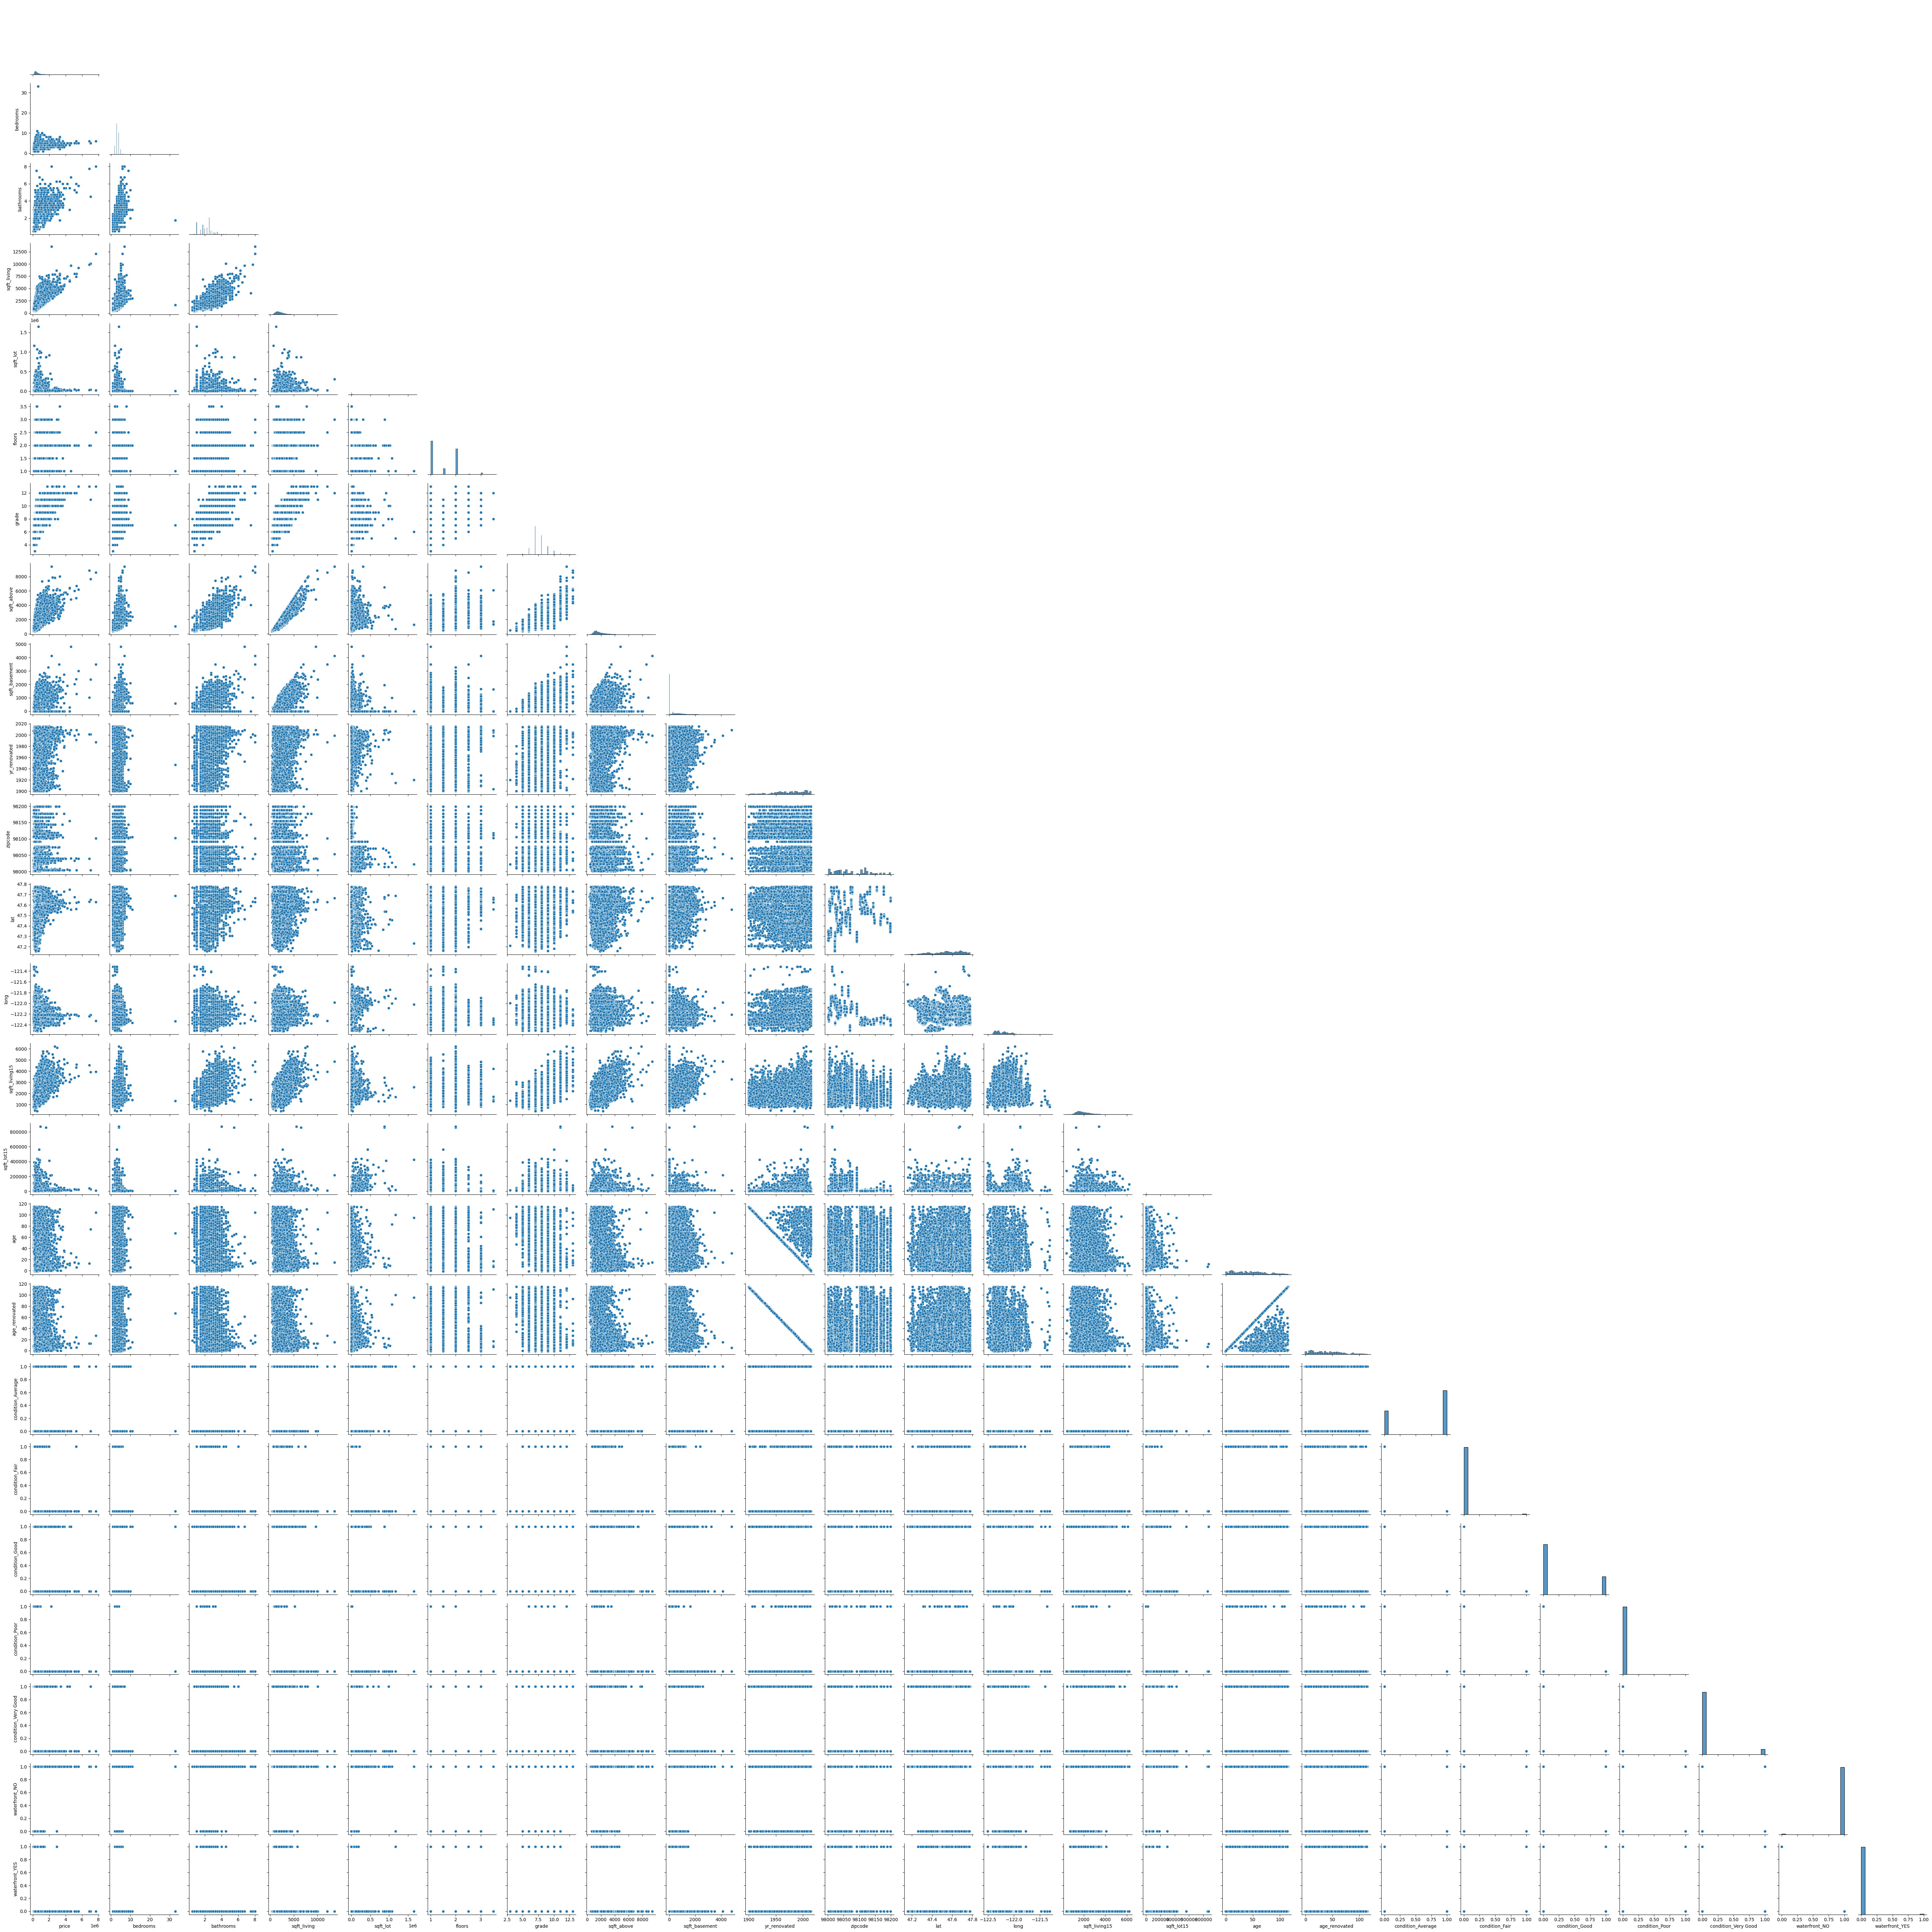

In [ ]:
#quickly scan for linearity
sns.pairplot(house_df2_final, diag_kind = 'hist', corner = True)

**Conclusion:** Some variable are not correlated worth exploring more  

<Axes: >

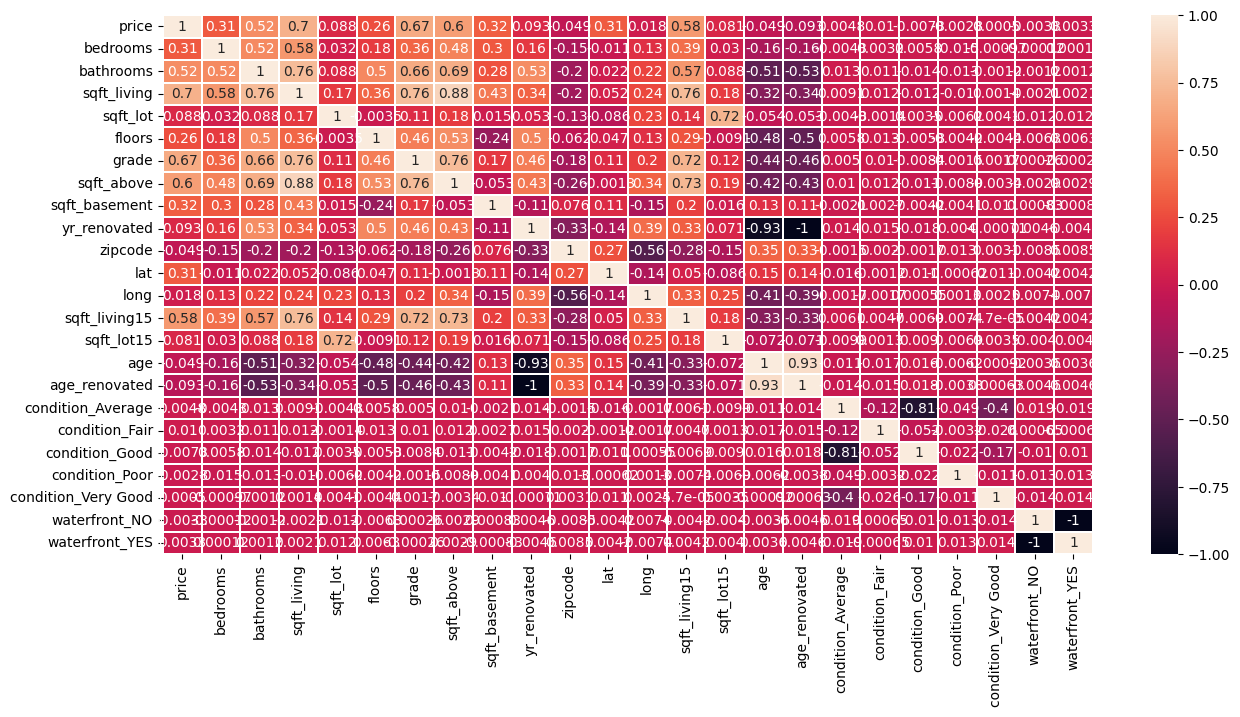

In [ ]:
# plotting the correlationmatrix 
plt.figure(figsize =(15,7))
sns.heatmap(house_df2_final.corr() , annot =True , linewidth =0.2)

##**4.0 Modelling**

### **4.1 Baseline Model**

In [ ]:
#our target variable will be price content.
X = house_df2_final.drop("price", axis=1) # predictors  # always avoid data leakage
y = house_df2_final["price"]# target

In [ ]:
# statmodel
# use sm.add_constant(), to add constant term/y-intercept
X_pred = sm.add_constant(X)# we add constant to differentiate predictor from other features.

#building the model
model =  sm.OLS(y,X_pred) .fit()

#getting the model summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     1964.
Date:                Fri, 02 Jun 2023   Prob (F-statistic):               0.00
Time:                        16:31:57   Log-Likelihood:            -2.9085e+05
No. Observations:               21244   AIC:                         5.818e+05
Df Residuals:                   21222   BIC:                         5.819e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -3.371e+07   4.13e+06     -8.159      0.000   -4.18e+07   -2.56e+07
bedrooms             -4.55e+04   2024.056    -22.479      0.000   -4.95e+04   -4.15e+04
bathrooms            4.745e+04   3497.152     13.569      0.000    4.06e+04    5.43e+04
sqft_living           109.1784     22.653      4.820      0.000      64.777     153.580
sqft_lot                0.1422      0.051      2.792      0.005       0.042       0.242
floors               9096.6499   3867.668      2.352      0.019    1515.728    1.67e+04
grade                1.033e+05   2309.367     44.711      0.000    9.87e+04    1.08e+05
sqft_above             76.7000     22.666      3.384      0.001      32.272     121.128
sqft_basement          74.6117     22.657      3.293      0.001      30.202     119.021
yr_renovated         2.549e+04   3143.506      8.108      0.000    1.93e+04    3.17e+04
zipcode              -522.2306     34.950    -14.942      0.000    -590.736    -453.725
lat                  5.477e+05   1.14e+04     48.031      0.000    5.25e+05     5.7e+05
long                -2.482e+05   1.41e+04    -17.635      0.000   -2.76e+05   -2.21e+05
sqft_living15          38.0384      3.657     10.401      0.000      30.870      45.207
sqft_lot15             -0.3115      0.078     -3.992      0.000      -0.464      -0.159
age                  3854.6952    135.390     28.471      0.000    3589.321    4120.069
age_renovated        2.487e+04   3144.132      7.909      0.000    1.87e+04     3.1e+04
condition_Average   -6.755e+06   8.26e+05     -8.176      0.000   -8.37e+06   -5.14e+06
condition_Fair      -6.735e+06   8.26e+05     -8.150      0.000   -8.35e+06   -5.11e+06
condition_Good      -6.757e+06   8.26e+05     -8.179      0.000   -8.38e+06   -5.14e+06
condition_Poor      -6.703e+06   8.27e+05     -8.102      0.000   -8.32e+06   -5.08e+06
condition_Very Good -6.758e+06   8.26e+05     -8.180      0.000   -8.38e+06   -5.14e+06
waterfront_NO       -1.685e+07   2.07e+06     -8.159      0.000   -2.09e+07   -1.28e+07
waterfront_YES      -1.685e+07   2.07e+06     -8.159      0.000   -2.09e+07   -1.28e+07
==============================================================================
Omnibus:                    19043.086   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1873733.100
Skew:                           3.914   Prob(JB):                         0.00
Kurtosis:                      48.338   Cond. No.                     1.39e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.11e-28. This might indicate that there are
strong multicollinearity problems or that the design matr

**Conclusion**: Our first model has an adjusted r-squared of .660 All features with p_values that aresignificant,  let's check our residuals.

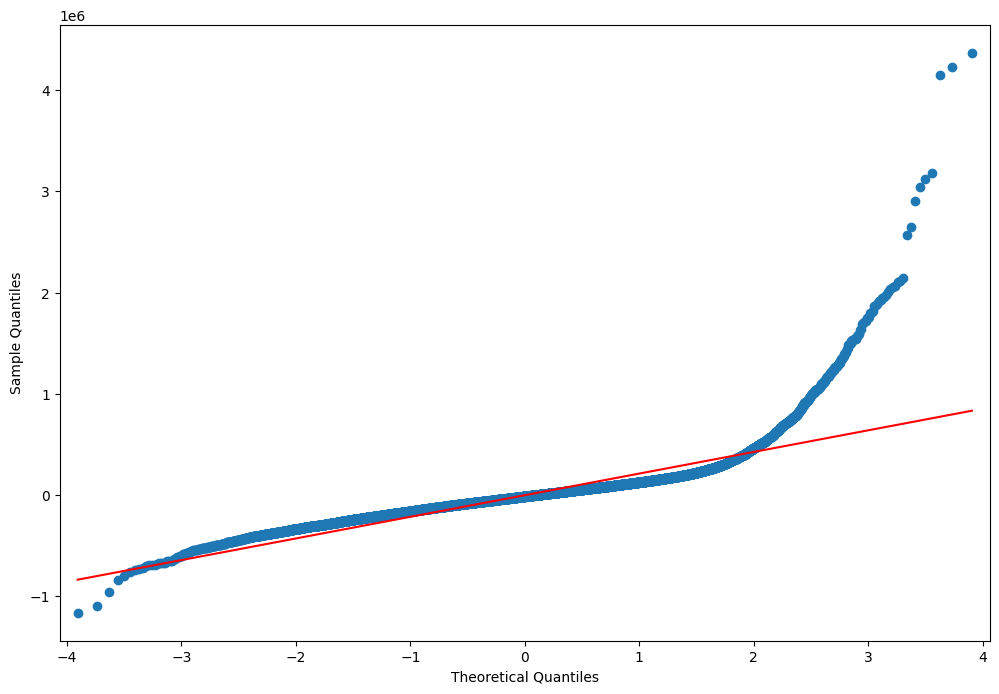

In [ ]:
import statsmodels.graphics.gofplots as smg
# Obtain the residuals
residuals = model.resid

# Create the QQ plot
smg.qqplot(residuals, line='s')

# Show the plot
plt.show()

**Conclusion**.Residuals are not normal, which violates are assumption of normality we will use log transform 

##**4.2 Model 2 with log transformed y variables**

In [ ]:
#our target variable will be price content.
X = house_df2_final.drop("price", axis=1) # predictors  # always avoid data leakage
y = house_df2_final["price"]# target
y_log = np.log(y)

In [ ]:
# statmodel
# use sm.add_constant(), to add constant term/y-intercept
X_pred = sm.add_constant(X)# we add constant to differentiate predictor from other features.

#building the model
model =  sm.OLS(y_log,X_pred) .fit()

#getting the model summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     3083.
Date:                Fri, 02 Jun 2023   Prob (F-statistic):               0.00
Time:                        16:31:57   Log-Likelihood:                -1605.8
No. Observations:               21244   AIC:                             3256.
Df Residuals:                   21222   BIC:                             3431.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 -57.7562      5.046    -11.446      0.000     -67.647     -47.866
bedrooms               -0.0199      0.002     -8.052      0.000      -0.025      -0.015
bathrooms               0.0788      0.004     18.452      0.000       0.070       0.087
sqft_living             0.0002   2.77e-05      5.452      0.000    9.66e-05       0.000
sqft_lot             4.781e-07   6.22e-08      7.687      0.000    3.56e-07       6e-07
floors                  0.0741      0.005     15.681      0.000       0.065       0.083
grade                   0.1671      0.003     59.226      0.000       0.162       0.173
sqft_above          -1.326e-05   2.77e-05     -0.479      0.632   -6.75e-05     4.1e-05
sqft_basement        3.739e-05   2.77e-05      1.351      0.177   -1.69e-05    9.16e-05
yr_renovated            0.0423      0.004     11.022      0.000       0.035       0.050
zipcode                -0.0006   4.27e-05    -15.053      0.000      -0.001      -0.001
lat                     1.3380      0.014     96.073      0.000       1.311       1.365
long                   -0.1897      0.017    -11.035      0.000      -0.223      -0.156
sqft_living15           0.0001   4.47e-06     25.514      0.000       0.000       0.000
sqft_lot15          -1.761e-07   9.53e-08     -1.848      0.065   -3.63e-07    1.07e-08
age                     0.0052      0.000     31.412      0.000       0.005       0.006
age_renovated           0.0415      0.004     10.811      0.000       0.034       0.049
condition_Average     -11.5599      1.009    -11.456      0.000     -13.538      -9.582
condition_Fair        -11.5576      1.009    -11.450      0.000     -13.536      -9.579
condition_Good        -11.5660      1.009    -11.462      0.000     -13.544      -9.588
condition_Poor        -11.5136      1.011    -11.394      0.000     -13.494      -9.533
condition_Very Good   -11.5591      1.009    -11.455      0.000     -13.537      -9.581
waterfront_NO         -28.8839      2.523    -11.448      0.000     -33.829     -23.939
waterfront_YES        -28.8723      2.523    -11.443      0.000     -33.818     -23.927
==============================================================================
Omnibus:                      438.521   Durbin-Watson:                   1.184
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              969.149
Skew:                           0.002   Prob(JB):                    3.56e-211
Kurtosis:                       4.046   Cond. No.                     1.39e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.11e-28. This might indicate that there are
strong multicollinearity problems or that the design matr

**Conclusion:** After log transformation of the dependent variable Our second  model has an adjusted r-squared of .753 One  features with p_values that is not significant, but before we drop these features from the data, let's check our residuals.

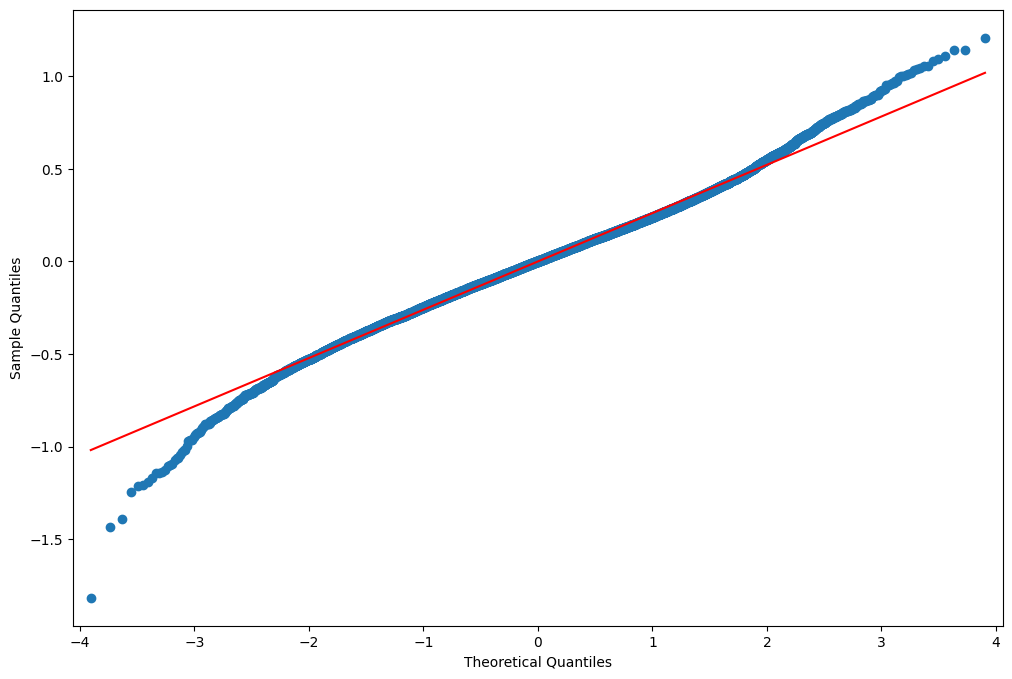

In [ ]:
#Plot QQ plot for the second model 

# Obtain the residuals
residuals = model.resid

# Create the QQ plot
smg.qqplot(residuals, line='s')

# Show the plot
plt.show()


**Conclusion:** After log transformation of the dependent variables our residuals are much closer to a normal distribution.

###**4.3 Model 3: Dealing with Multicollinearity**

<Axes: >

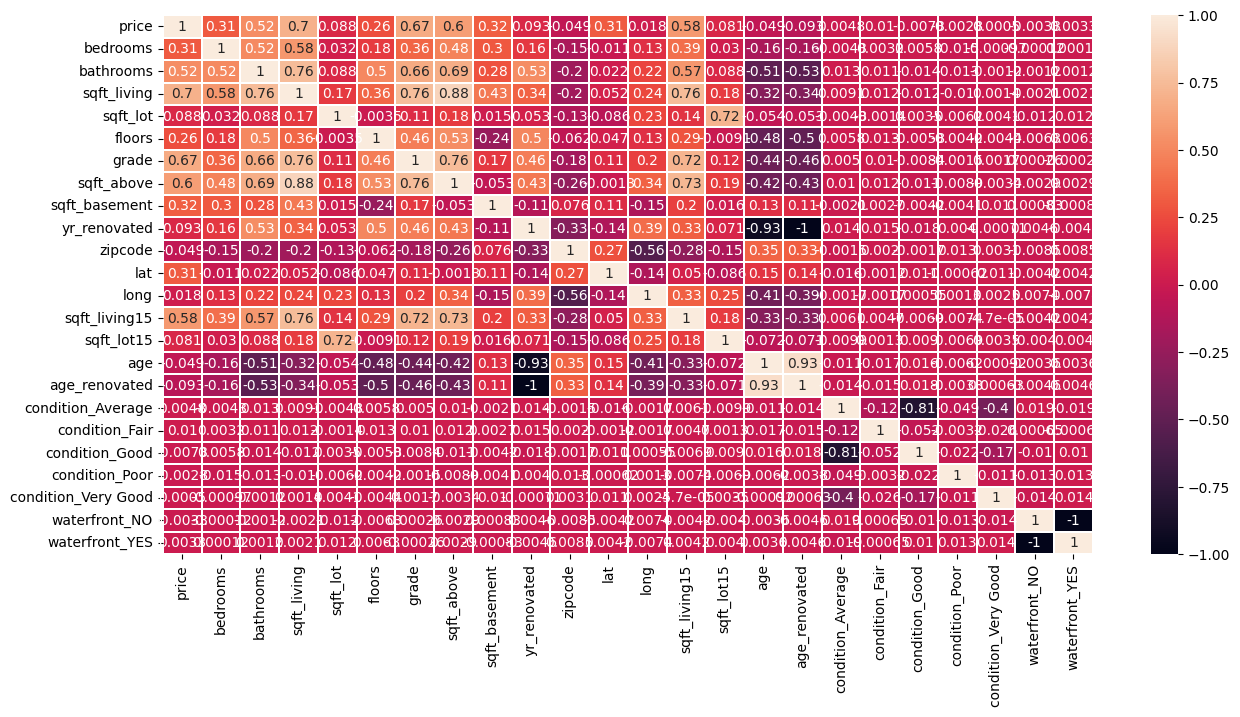

In [ ]:
# plotting the correlationmatrix 
plt.figure(figsize =(15,7))
sns.heatmap(house_df2_final.corr() , annot =True , linewidth =0.2)

In [ ]:
#### checking variable with correlation of 0.7  and obove
abs(X.corr()) >= .7

bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
bedrooms                 True      False        False     False   False   
bathrooms               False       True         True     False   False   
sqft_living             False       True         True     False   False   
sqft_lot                False      False        False      True   False   
floors                  False      False        False     False    True   
grade                   False      False         True     False   False   
sqft_above              False      False         True     False   False   
sqft_basement           False      False        False     False   False   
yr_renovated            False      False        False     False   False   
zipcode                 False      False        False     False   False   
lat                     False      False        False     False   False   
long                    False      False        False     False   False   
sqft_living15           False      False         True     False   False   
sqft_lot15              False      False        False      True   False   
age                     False      False        False     False   False   
age_renovated           False      False        False     False   False   
condition_Average       False      False        False     False   False   
condition_Fair          False      False        False     False   False   
condition_Good          False      False        False     False   False   
condition_Poor          False      False        False     False   False   
condition_Very Good     False      False        False     False   False   
waterfront_NO           False      False        False     False   False   
waterfront_YES          False      False        False     False   False   

                     grade  sqft_above  sqft_basement  yr_renovated  zipcode  \
bedrooms             False       False          False         False    False   
bathrooms            False       False          False         False    False   
sqft_living           True        True          False         False    False   
sqft_lot             False       False          False         False    False   
floors               False       False          False         False    False   
grade                 True        True          False         False    False   
sqft_above            True        True          False         False    False   
sqft_basement        False       False           True         False    False   
yr_renovated         False       False          False          True    False   
zipcode              False       False          False         False     True   
lat                  False       False          False         False    False   
long                 False       False          False         False    False   
sqft_living15         True        True          False         False    False   
sqft_lot15           False       False          False         False    False   
age                  False       False          False          True    False   
age_renovated        False       False          False          True    False   
condition_Average    False       False          False         False    False   
condition_Fair       False       False          False         False    False   
condition_Good       False       False          False         False    False   
condition_Poor       False       False          False         False    False   
condition_Very Good  False       False          False         False    False   
waterfront_NO        False       False          False         False    False   
waterfront_YES       False       False          False         False    False   

                     ...  sqft_lot15    age  age_renovated  condition_Average  \
bedrooms             ...       False  False          False              False   
bathrooms            ...       False  False          False              False   
sqft_living          ...       False  False          Fal

**Conclusion:** There are several features with high correlation worth exploring more

In [ ]:
corr_df = X.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
corr_df['pairs'] = list(zip(corr_df.level_0, corr_df.level_1))

# set index to pairs
corr_df.set_index(['pairs'], inplace = True)

#drop level columns
corr_df.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
corr_df.columns = ['cc']

# drop duplicates
corr_df.drop_duplicates(inplace=True)

In [ ]:
#Filter and correlations above .7 and below 1
corr_df[(corr_df.cc>.70) & (corr_df.cc <1)]

cc
pairs                                        
(age_renovated, yr_renovated)        0.999869
(age_renovated, age)                 0.925105
(yr_renovated, age)                  0.925082
(sqft_above, sqft_living)            0.875406
(condition_Good, condition_Average)  0.813025
(sqft_living, grade)                 0.762370
(sqft_living15, sqft_living)         0.756164
(sqft_above, grade)                  0.755953
(bathrooms, sqft_living)             0.755948
(sqft_above, sqft_living15)          0.731731
(sqft_lot15, sqft_lot)               0.717135
(sqft_living15, grade)               0.715253

**Conclusion**: There are several features that seem to have multicollinearity. Rather than just dropping some of these features, let's first look at the variance inflation factor to understand the severity of the multicollinearity.

In [ ]:
#Create dictionary of features and their variance inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = sm.add_constant(X)
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_dict = dict(zip(X.columns, vif))
vif_dict

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1752: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


{'const': 0.0,
 'bedrooms': 1.6307403800532274,
 'bathrooms': 3.346449843098275,
 'sqft_living': 200.22111344390765,
 'sqft_lot': 2.09137004617286,
 'floors': 2.006254124744723,
 'grade': 3.3936632706972274,
 'sqft_above': 162.81164790650422,
 'sqft_basement': 45.91100868249492,
 'yr_renovated': 3831.2944979604404,
 'zipcode': 1.6267951592089493,
 'lat': 1.164138491509265,
 'long': 1.823385301487571,
 'sqft_living15': 2.9056138037117396,
 'sqft_lot15': 2.1258454130348245,
 'age': 7.3157623914778975,
 'age_renovated': 3834.145897152863,
 'condition_Average': inf,
 'condition_Fair': inf,
 'condition_Good': inf,
 'condition_Poor': inf,
 'condition_Very Good': inf,
 'waterfront_NO': inf,
 'waterfront_YES': inf}

In [ ]:
#Create a list of columns to drop with a vif cutoff of 
new_dict = {}
for (key, value) in vif_dict.items():
    if value >= 6:
        new_dict[key] = value
columns_to_drop = list(new_dict.keys())
columns_to_drop = columns_to_drop[1:]
columns_to_drop

['sqft_above',
 'sqft_basement',
 'yr_renovated',
 'age',
 'age_renovated',
 'condition_Average',
 'condition_Fair',
 'condition_Good',
 'condition_Poor',
 'condition_Very Good',
 'waterfront_NO',
 'waterfront_YES']

**conclusion** all have VIF OF 6  and above 'sqft_above',
 'sqft_basement',
 'yr_renovated',
 'age',
 'age_renovated',
 'condition_Average',
 'condition_Fair',
 'condition_Good',
 'condition_Poor',
 'condition_Very Good',
 'waterfront_NO',
 'waterfront_YES']

In [ ]:
## dropping 'sqft_basement', 'yr_renovated', 'age', 'condition_Poor','condition_Fair' to reduce multicollinearity
house_df3_final = house_df2_final.drop(['sqft_basement', 'yr_renovated', 'age', 'condition_Poor','condition_Fair'], axis=1)

In [ ]:
#our target variable will be price content.
X = house_df3_final.drop("price", axis=1) # predictors  # always avoid data leakage
y = house_df3_final["price"]# target
y_log = np.log(y)

In [ ]:
# statmodel
# use sm.add_constant(), to add constant term/y-intercept
X_pred = sm.add_constant(X)# we add constant to differentiate predictor from other features.

#building the model
model =  sm.OLS(y_log,X_pred) .fit()

#getting the model summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     3560.
Date:                Fri, 02 Jun 2023   Prob (F-statistic):               0.00
Time:                        16:32:02   Log-Likelihood:                -2142.8
No. Observations:               21244   AIC:                             4322.
Df Residuals:                   21226   BIC:                             4465.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 -18.8848      2.514     -7.511      0.000     -23.813     -13.956
bedrooms               -0.0199      0.003     -7.865      0.000      -0.025      -0.015
bathrooms               0.0723      0.004     16.528      0.000       0.064       0.081
sqft_living             0.0002   5.77e-06     35.110      0.000       0.000       0.000
sqft_lot             5.061e-07   6.38e-08      7.936      0.000    3.81e-07    6.31e-07
floors                  0.0654      0.005     13.530      0.000       0.056       0.075
grade                   0.1608      0.003     55.731      0.000       0.155       0.166
sqft_above          -5.464e-05   5.75e-06     -9.498      0.000   -6.59e-05   -4.34e-05
zipcode                -0.0006   4.37e-05    -12.863      0.000      -0.001      -0.000
lat                     1.3571      0.014     95.187      0.000       1.329       1.385
long                   -0.2443      0.018    -13.931      0.000      -0.279      -0.210
sqft_living15           0.0001   4.58e-06     24.091      0.000       0.000       0.000
sqft_lot15          -1.717e-07   9.77e-08     -1.757      0.079   -3.63e-07    1.99e-08
age_renovated           0.0037   8.94e-05     41.552      0.000       0.004       0.004
condition_Average      -0.0025      0.020     -0.129      0.898      -0.041       0.036
condition_Good         -0.0085      0.020     -0.431      0.666      -0.047       0.030
condition_Very Good    -0.0031      0.021     -0.153      0.878      -0.043       0.037
waterfront_NO          -9.4471      1.257     -7.515      0.000     -11.911      -6.983
waterfront_YES         -9.4377      1.257     -7.506      0.000     -11.902      -6.973
==============================================================================
Omnibus:                      427.815   Durbin-Watson:                   1.143
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              873.641
Skew:                           0.091   Prob(JB):                    1.96e-190
Kurtosis:                       3.977   Cond. No.                     3.46e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.8e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**Conclusion**: Our adjusted R squared stays the same at .740, but sqft_lot15,condition_Average,condition_Good,condition_Very Good is still showing as insignificant. We will remove this feature and rebuild our model.

###**4.4 Model 4: Dropping Insignificant Features**

In [ ]:
## dropping 'sqft_basement', 'yr_renovated', 'age', 'condition_Poor','condition_Fair' to reduce multicollinearity
house_df4_final = house_df3_final.drop(['sqft_lot15', 'condition_Average', 'condition_Good', 'condition_Very Good'], axis=1)

In [ ]:
#our target variable will be price content.
X = house_df4_final.drop("price", axis=1) # predictors  # always avoid data leakage
y = house_df4_final["price"]# target
y_log = np.log(y)

In [ ]:
# statmodel
# use sm.add_constant(), to add constant term/y-intercept
X_pred = sm.add_constant(X)# we add constant to differentiate predictor from other features.

#building the model
model =  sm.OLS(y_log,X_pred) .fit()

#getting the model summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     4654.
Date:                Fri, 02 Jun 2023   Prob (F-statistic):               0.00
Time:                        16:32:02   Log-Likelihood:                -2145.4
No. Observations:               21244   AIC:                             4319.
Df Residuals:                   21230   BIC:                             4430.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -19.1124      2.512     -7.609      0.000     -24.036     -14.189
bedrooms          -0.0198      0.003     -7.819      0.000      -0.025      -0.015
bathrooms          0.0725      0.004     16.586      0.000       0.064       0.081
sqft_living        0.0002   5.77e-06     35.087      0.000       0.000       0.000
sqft_lot        4.287e-07   4.63e-08      9.256      0.000    3.38e-07    5.19e-07
floors             0.0657      0.005     13.593      0.000       0.056       0.075
grade              0.1609      0.003     55.785      0.000       0.155       0.167
sqft_above     -5.477e-05   5.75e-06     -9.523      0.000    -6.6e-05   -4.35e-05
zipcode           -0.0006   4.37e-05    -12.865      0.000      -0.001      -0.000
lat                1.3575      0.014     95.255      0.000       1.330       1.385
long              -0.2469      0.017    -14.131      0.000      -0.281      -0.213
sqft_living15      0.0001   4.57e-06     24.031      0.000       0.000       0.000
age_renovated      0.0037   8.93e-05     41.553      0.000       0.004       0.004
waterfront_NO     -9.5608      1.256     -7.614      0.000     -12.022      -7.099
waterfront_YES    -9.5516      1.256     -7.605      0.000     -12.013      -7.090
==============================================================================
Omnibus:                      426.976   Durbin-Watson:                   1.143
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              873.336
Skew:                           0.089   Prob(JB):                    2.28e-190
Kurtosis:                       3.977   Cond. No.                     8.82e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.71e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**Conclusion:** Our adjusted R squared still stays the same at .740 and all features are significant. Next, we will further refine our data by removing additional, potential outliers

###**3.6 Model 5: Standardizing  Features**

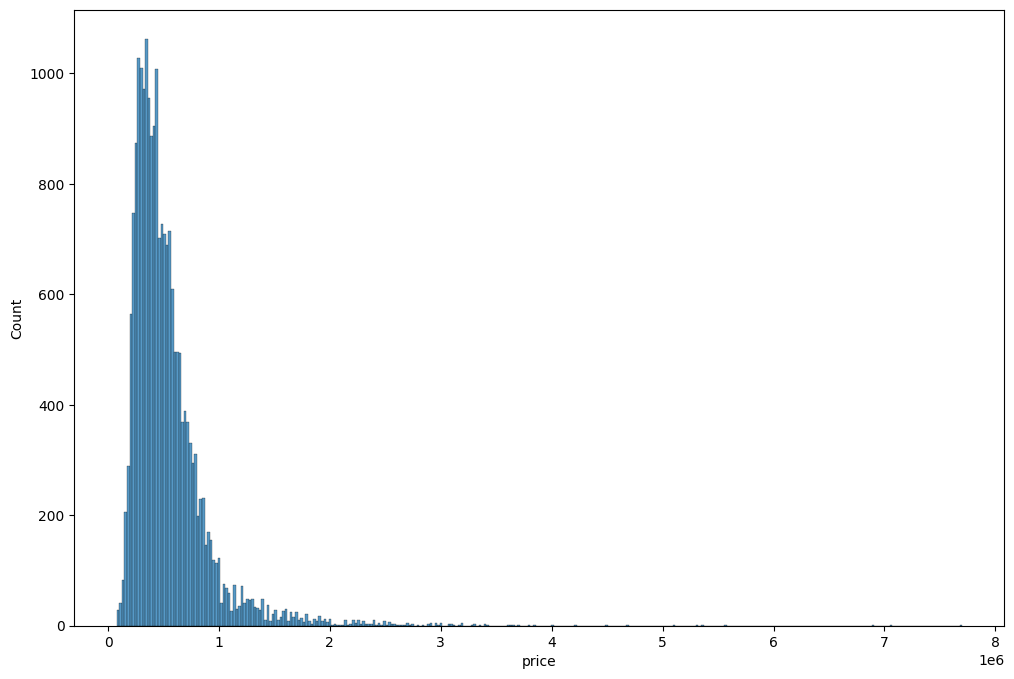

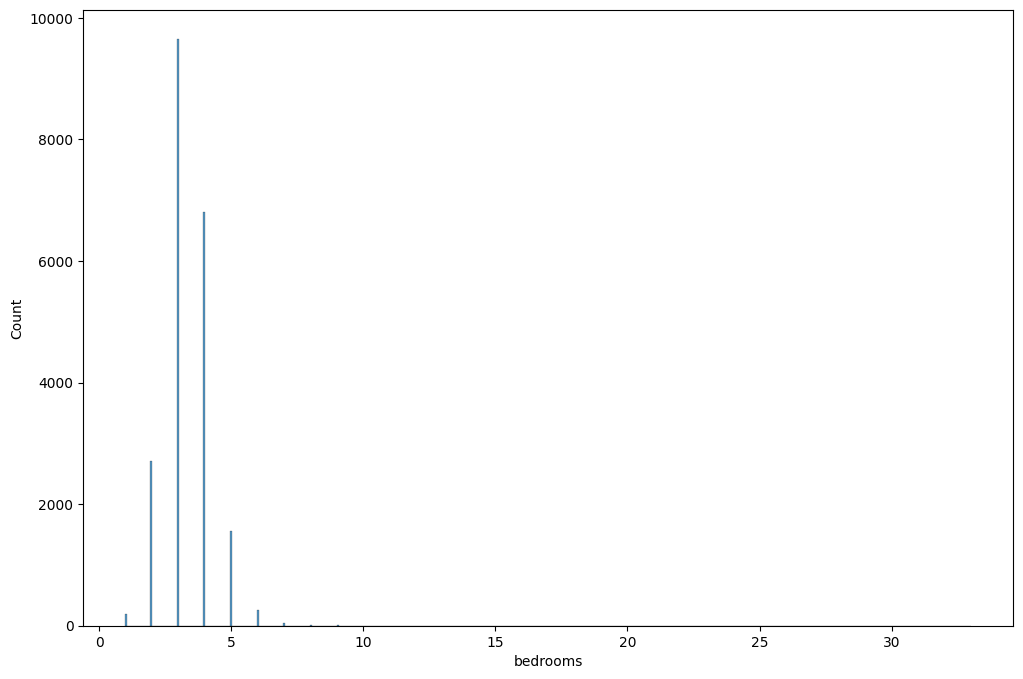

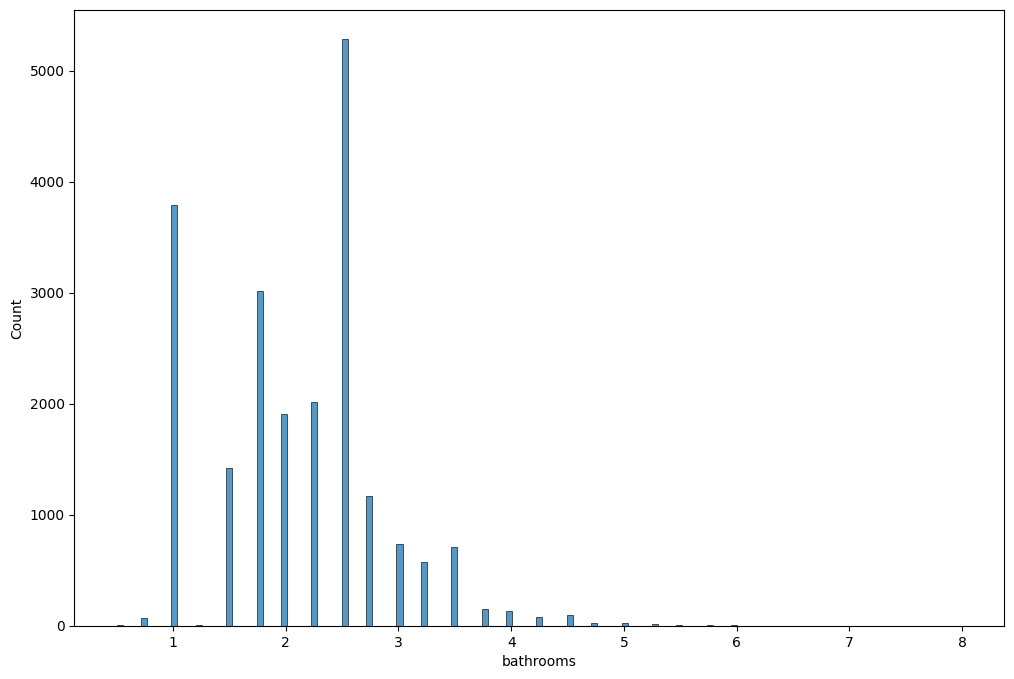

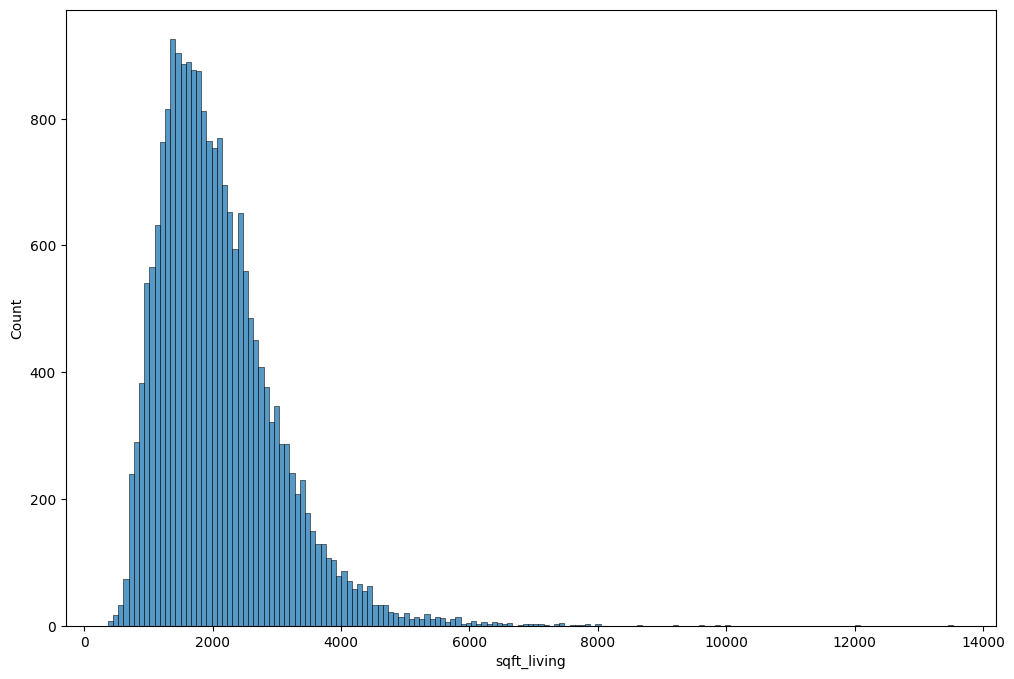

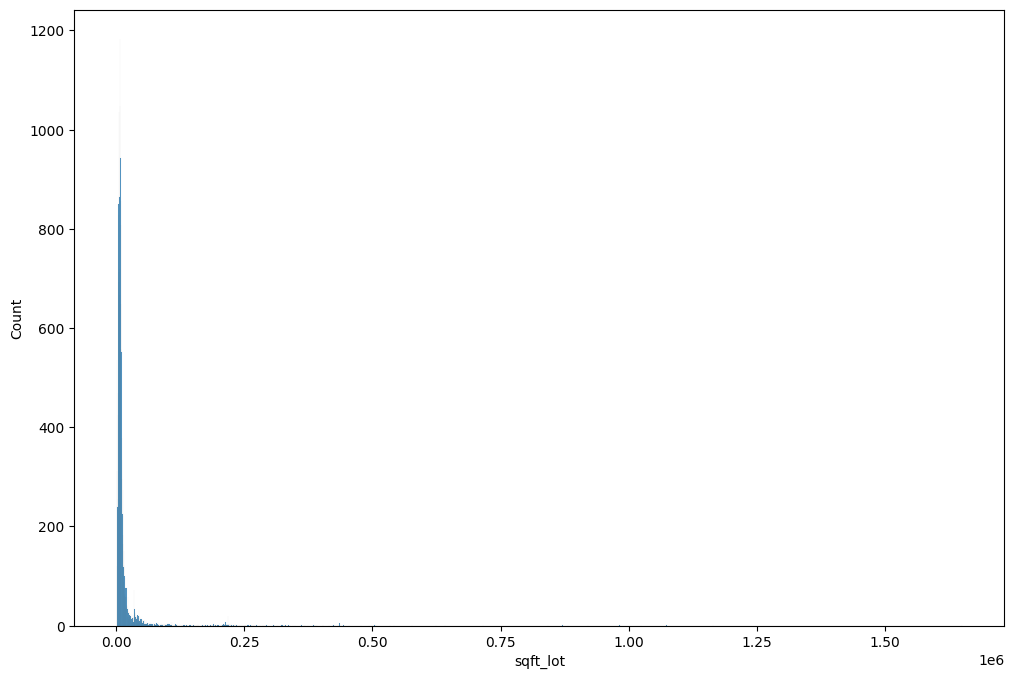

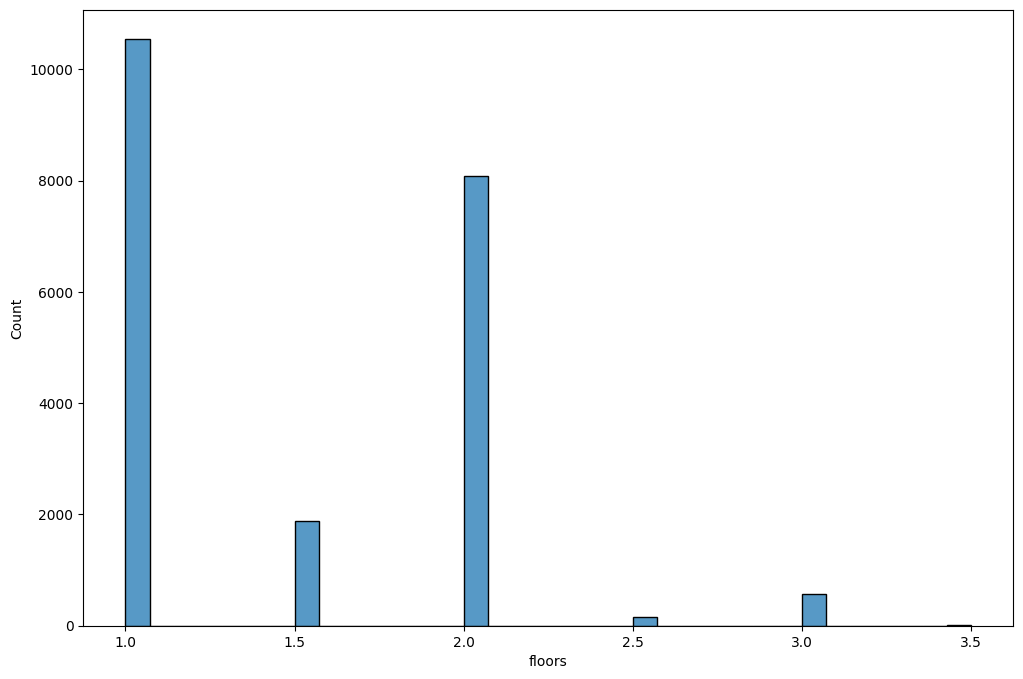

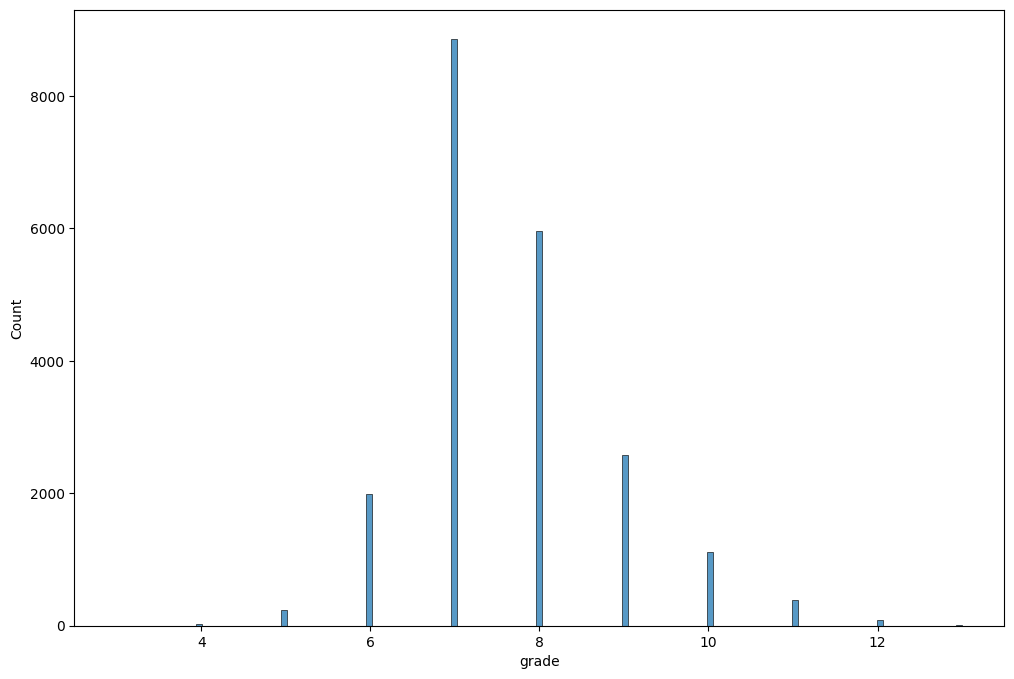

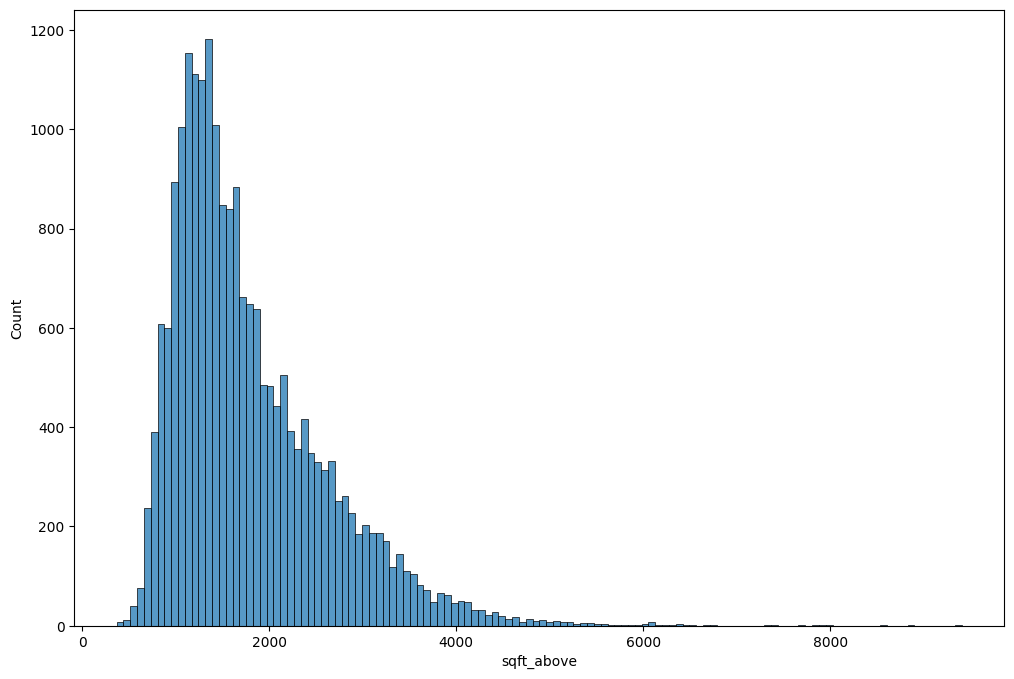

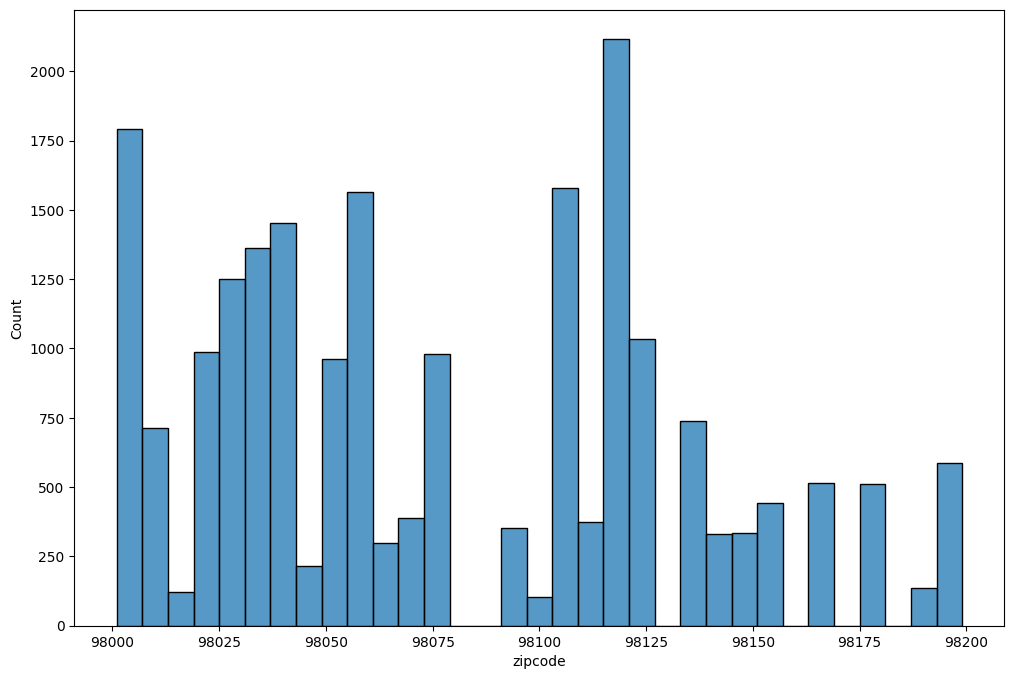

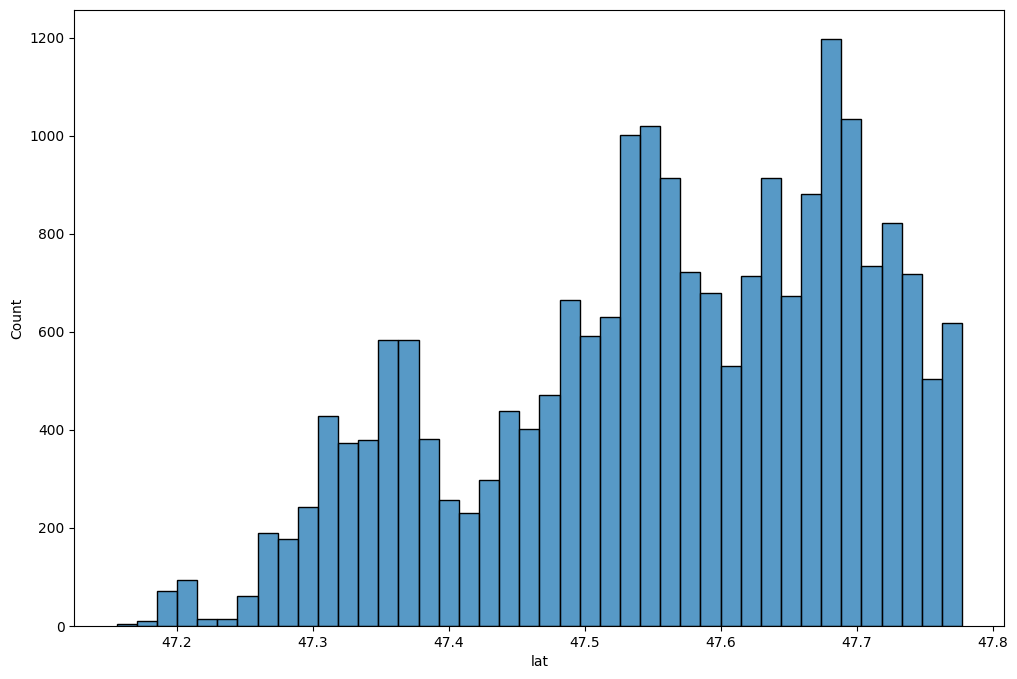

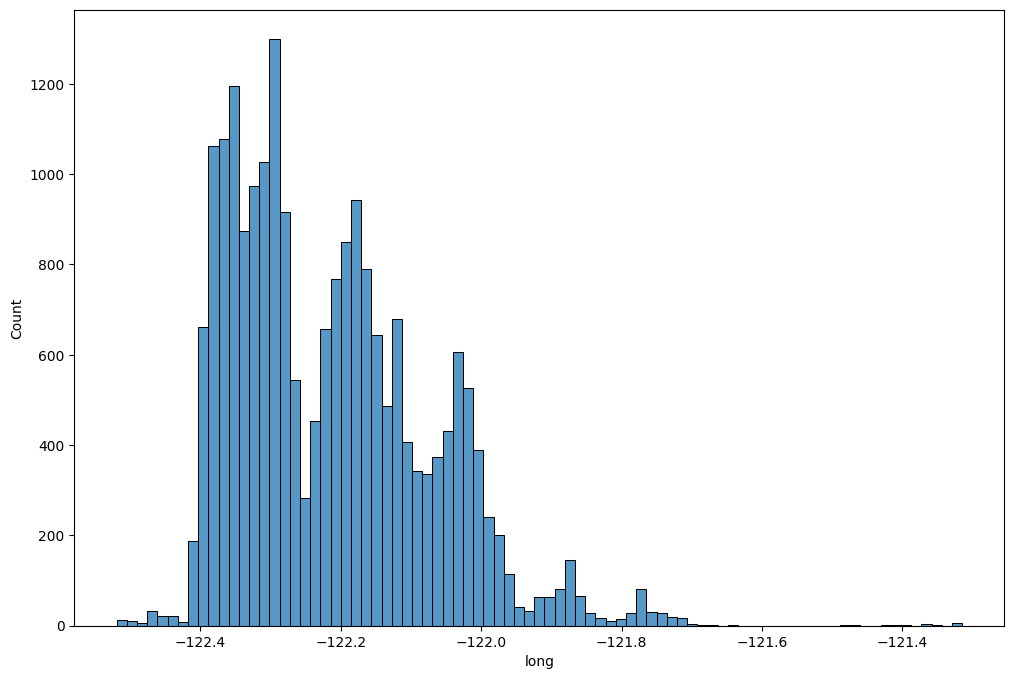

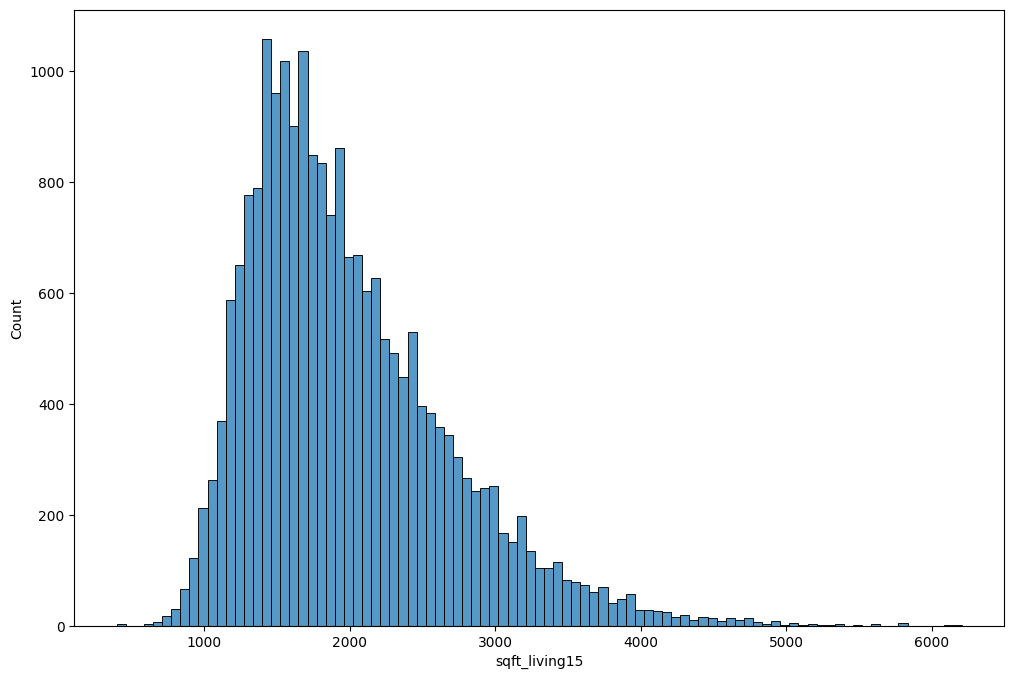

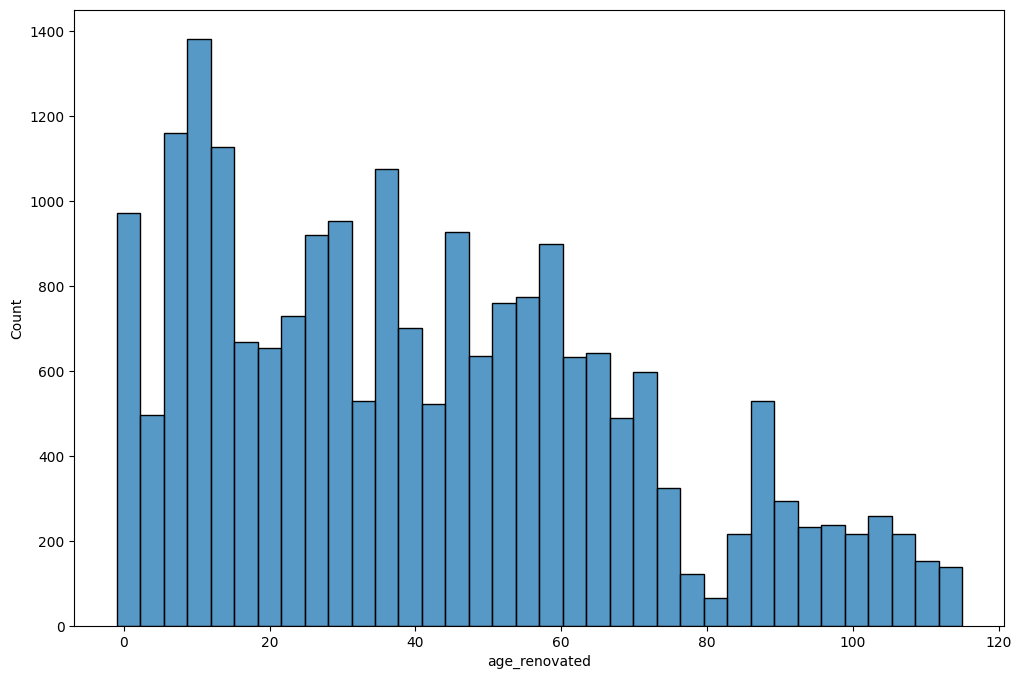

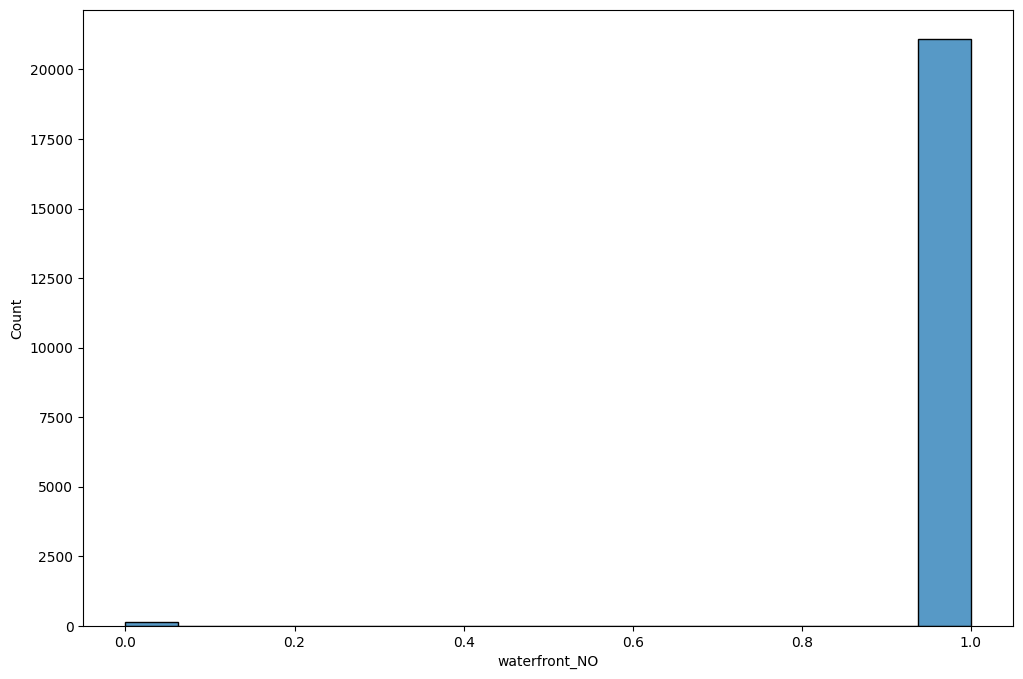

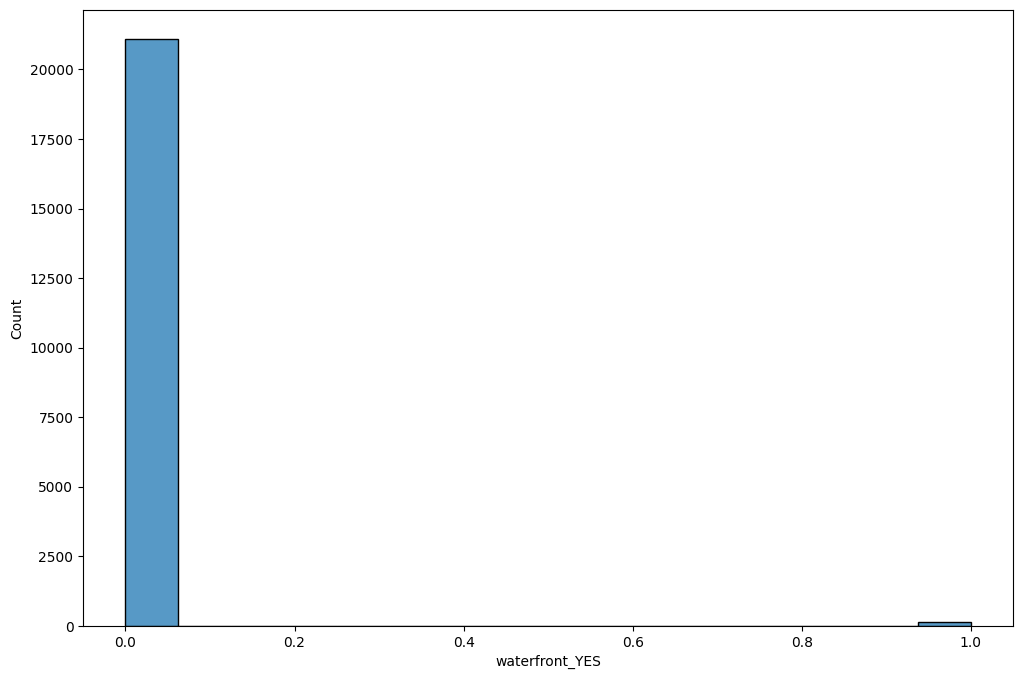

In [ ]:
#View distribution plots for all columns
for col in house_df4_final.columns:
    plt.subplots(1, 1)
    sns.histplot(house_df4_final[col])

**Conclusion:** Several features have heavy tails, so we will reduce these features by removing outliers.Bedrooms and sqft_lot have extreme outliers. Sqft_living also has outliers, so we will remove them from each of these columns.

In [ ]:
house_df5_final = house_df4_final.copy()  # Create a copy of house_df4_final

house_df5_final.loc[house_df5_final['bedrooms'] >= 11]   # Set bedroom values to NaN if >= 11
house_df5_final.loc[house_df5_final['sqft_lot'] > 15000]  # Set sqft_lot values to NaN if > 15000
house_df5_final.loc[house_df5_final['sqft_living'] > 5000 ] #  # Set sqft_living values to NaN if > 5000



In [ ]:
### conduct simple regression 
for col in house_df5_final.columns:
    plt.subplots(1, 1)
    sns.regplot(x=col, y='price', data=house_df5_final)
    plt.xlabel(col)
    plt.ylabel('Price')
    plt.show()

In [ ]:
#our target variable will be price content.
X = house_df5_final.drop("price", axis=1) # predictors  # always avoid data leakage
y = house_df5_final["price"]# target
y_log = np.log(y)


In [ ]:
# statmodel
# use sm.add_constant(), to add constant term/y-intercept
X_pred = sm.add_constant(X)# we add constant to differentiate predictor from other features.

#building the model
model =  sm.OLS(y_log,X_pred) .fit()

#getting the model summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     4654.
Date:                Fri, 02 Jun 2023   Prob (F-statistic):               0.00
Time:                        17:43:02   Log-Likelihood:                -2145.4
No. Observations:               21244   AIC:                             4319.
Df Residuals:                   21230   BIC:                             4430.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -19.1124      2.512     -7.609      0.000     -24.036     -14.189
bedrooms          -0.0198      0.003     -7.819      0.000      -0.025      -0.015
bathrooms          0.0725      0.004     16.586      0.000       0.064       0.081
sqft_living        0.0002   5.77e-06     35.087      0.000       0.000       0.000
sqft_lot        4.287e-07   4.63e-08      9.256      0.000    3.38e-07    5.19e-07
floors             0.0657      0.005     13.593      0.000       0.056       0.075
grade              0.1609      0.003     55.785      0.000       0.155       0.167
sqft_above     -5.477e-05   5.75e-06     -9.523      0.000    -6.6e-05   -4.35e-05
zipcode           -0.0006   4.37e-05    -12.865      0.000      -0.001      -0.000
lat                1.3575      0.014     95.255      0.000       1.330       1.385
long              -0.2469      0.017    -14.131      0.000      -0.281      -0.213
sqft_living15      0.0001   4.57e-06     24.031      0.000       0.000       0.000
age_renovated      0.0037   8.93e-05     41.553      0.000       0.004       0.004
waterfront_NO     -9.5608      1.256     -7.614      0.000     -12.022      -7.099
waterfront_YES    -9.5516      1.256     -7.605      0.000     -12.013      -7.090
==============================================================================
Omnibus:                      426.976   Durbin-Watson:                   1.143
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              873.336
Skew:                           0.089   Prob(JB):                    2.28e-190
Kurtosis:                       3.977   Cond. No.                     8.82e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.71e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Conclusion: Model 5 has r2 of 0.740 after stadardizing the feaures 

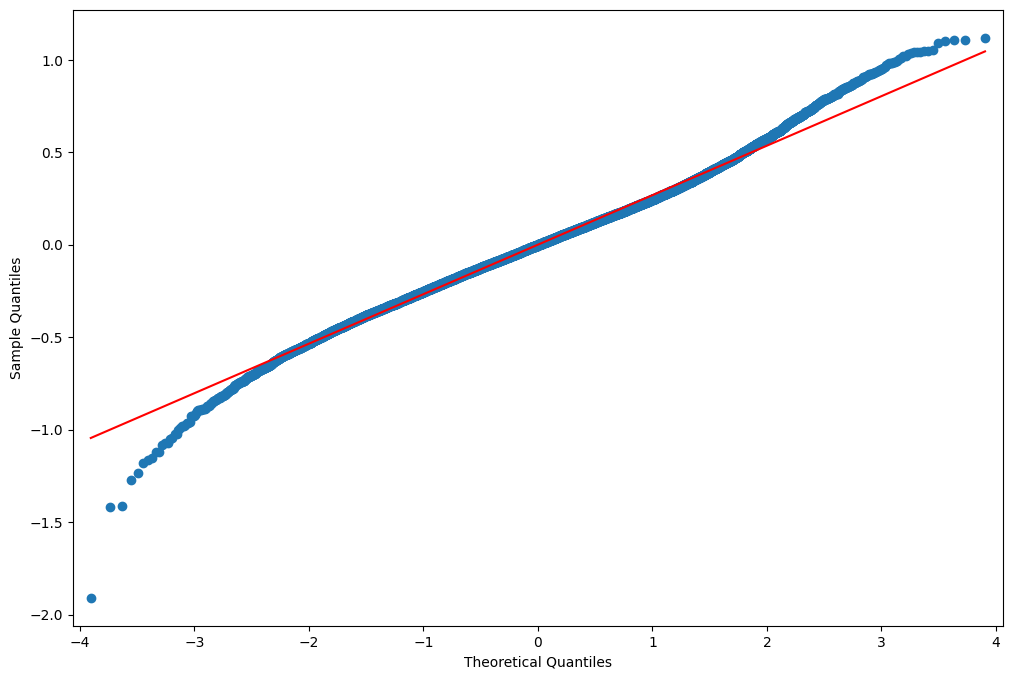

In [ ]:
#Plot QQ plot for the second model 

# Obtain the residuals
residuals = model.resid

# Create the QQ plot
smg.qqplot(residuals, line='s')

# Show the plot
plt.show()


**Conclusion:** The QQ plot shows normal distribution.

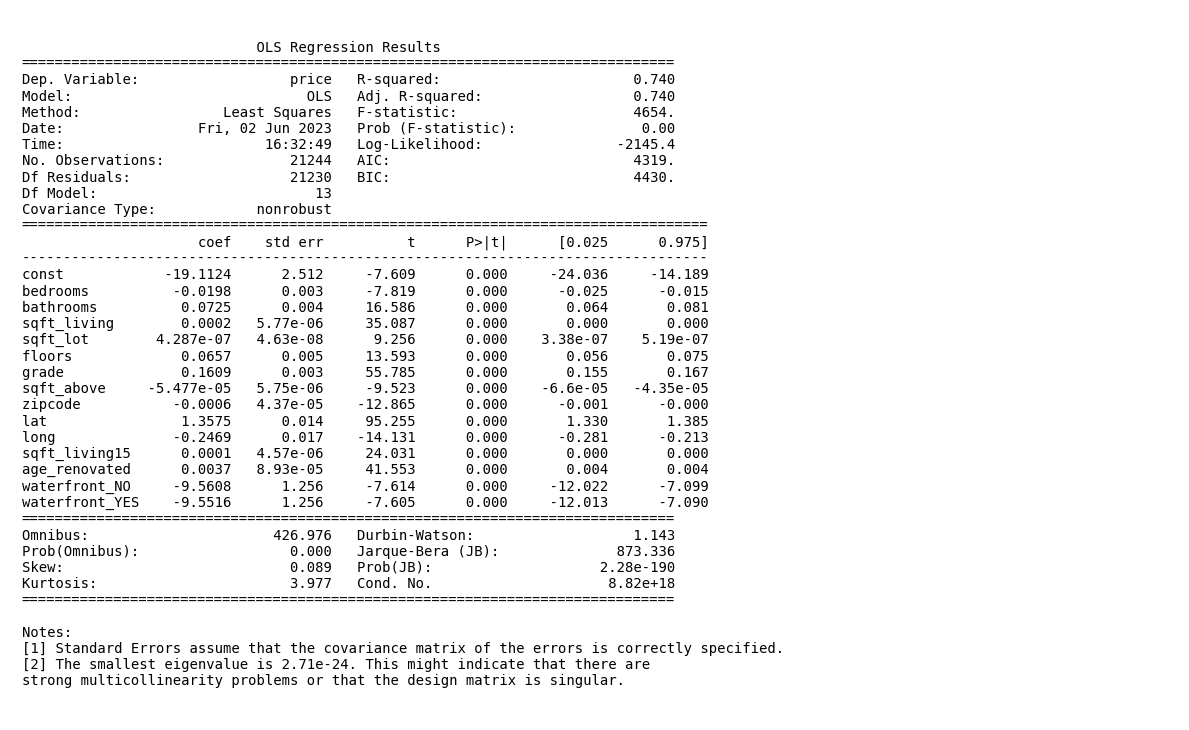

In [ ]:
import os
os.makedirs('Images', exist_ok=True)
#Save model summary as image
plt.rc('figure', figsize=(12, 8))
plt.text(0.01, 0.05, str(model.summary()), {'fontsize': 10}, fontproperties = 'monospace')
plt.axis('off')
plt.tight_layout()
plt.savefig('Images/FinalModel.png')

<ipython-input-531-d9f687dbf2ec>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model.resid)


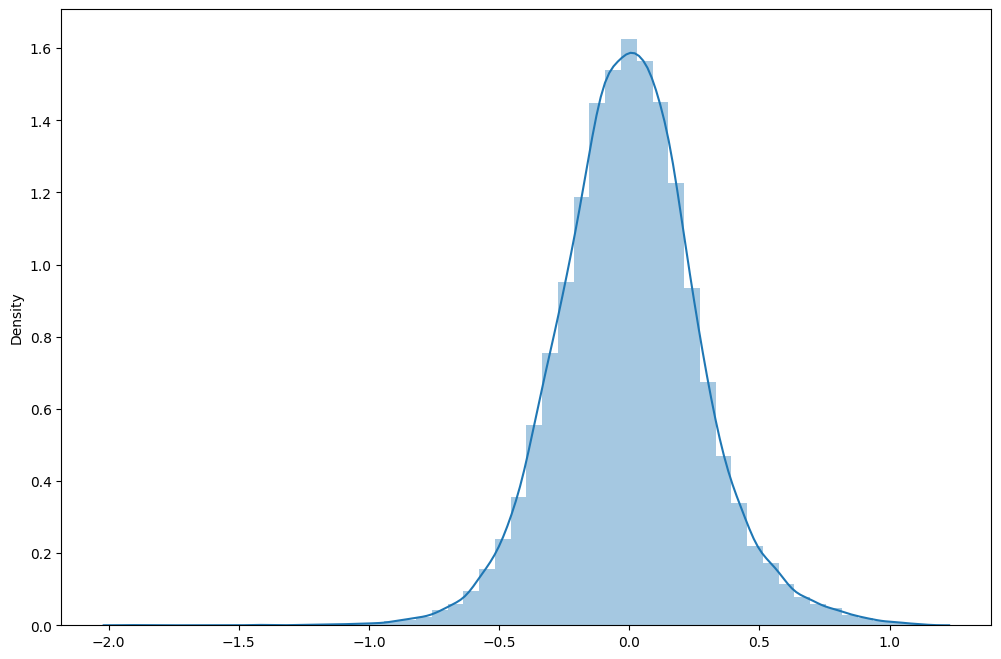

In [ ]:
###ploting residual to check normal distribution
sns.distplot(model.resid)
plt.savefig('Images/Finalresidual.png')

In [ ]:
import statsmodels.stats.api as sms

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(model.resid, model.model.exog)
list(zip(name, test))

[('F statistic', 1.0561782485627702), ('p-value', 0.002442965463353053)]

**Interpretation**:
Since the p-value (0.0024) is less than the significance level (e.g., 0.05), we can reject the null hypothesis. This suggests that there is significant evidence of heteroscedasticity in the data. It implies that the variance of the errors is not constant across the range of the predictors.

In summary,F statistic and p-value, there is evidence of heteroscedasticity in the data, indicating that the assumption of constant error variance may not hold.

In [ ]:
print("Final Regression Formula\n")
print(model.params[0], '+')
print(' + '.join([f'{model.params[i]} * {X.columns[i-1]}' for i in range(1, len(model.params))]))


Final Regression Formula

-19.112396532452323 +
-0.01979684610607551 * bedrooms + 0.07253655844195564 * bathrooms + 0.0002023838897631755 * sqft_living + 4.2866229151820155e-07 * sqft_lot + 0.06570339219768902 * floors + 0.16091514868200904 * grade + -5.4773571601932005e-05 * sqft_above + -0.0005621859739731656 * zipcode + 1.3575401595366339 * lat + -0.2469161627069505 * long + 0.00010989530962928794 * sqft_living15 + 0.003712013752856233 * age_renovated + -9.56082946405784 * waterfront_NO + -9.551567068387776 * waterfront_YES


##**5.0 Conclusion**
Multiple regression analysis was used to test if certain variables significantly predicted the sale price of homes in King County.

The results of the regression indicated that 11 features can be 74% be explaned by the price.All the features are statistically significant with a p-vaue of <0.05. 
Analyzing the models the following conclusion can be made.

1. An increase with one bedroom decreases the house sale by $ 0.002.

2. An increase with one bathroom increases the house price by $ 0.0725

3. An increase in the living space by one square foot increases the price pof the house by $ 0.0002

4. An increase in lot space by  one square feet decreases the house price by $ 4.287e-07

5.An increase in floors by one increases price by $0.0657

6. An increase in grade rating by one increases the price by $ 0.1609

7.An increase in one square from basement 



##**6.0 Recommendation**

##**7.0 Next steps**